In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk
import starspot as ss


In [2]:
#load data paths & lists

#data paths
secpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/sec{}_lc.fits'#.format(tic,sec)
stitchpath = '/Volumes/Seagate-stars/Final_Run/Clean_LCs_forBLS/{}/stitched_lc.fits'#.format(tic)
#train sets per model
rf1_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf1_training.csv')#includes ncvz google df & tois in rf2
rf2_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf2_training.csv')
rf3_train = pd.read_csv('/Volumes/Seagate-stars/Final_Run/test_sets/rf3_training.csv')
#train categories
variable = rf1_train[rf1_train['CLASS']==1]
flat = rf1_train[rf1_train['CLASS']==5]
yestransit = rf2_train[rf2_train['CLASS']==3]
notransit = rf2_train[rf2_train['CLASS']==1]
accurate = rf3_train[rf3_train['Label']==3]
inaccurate = rf3_train[rf3_train['Label']==1]


# Variable VS Flat
#### flats  have peaks more similar in height
#### variable display a clearer heirarchy 

In [3]:
# find good examples


## variable target search
# count=0 
# for tic,sec in variable[['TIC','Sector']].to_numpy():
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break
##remove b/c flat (ramp up start) 159502670

## flat target search
# count=0 
# for tic,sec in flat[['TIC','Sector']].to_numpy():
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break

In [4]:
#get data for sector lcs & periodograms

## variable target
variable_tic = 154089472
variable_sec = '14'
#open lc data to plot
variable_lcf = lk.open(secpath.format(variable_tic,variable_sec))
variable_lc = variable_lcf.FLUX
#run ls
variable_rotate = ss.RotationModel(variable_lc.time, variable_lc.flux, variable_lc.flux_err) #test if works with flux_err=None or need if/else
variable_ls_period = variable_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
variable_pg_powers = variable_rotate.power
variable_freq = variable_rotate.freq
variable_pg_periods = 1./variable_freq
#df for amps
variable_df = variable[(variable['TIC']==variable_tic) & (variable['Sector']==variable_sec)]
variable_rp1 = variable_df['ls-1'].to_numpy()
variable_rp2 = variable_df['ls-2'].to_numpy()
variable_rp3 = variable_df['ls-3'].to_numpy()

## flat target
flat_tic = 153975515 #really flat 15996889 15 #ramps when restarting 16311292 15
flat_sec = '14'
#open lc data to plot
flat_lcf = lk.open(secpath.format(flat_tic,flat_sec))
flat_lc = flat_lcf.FLUX
#run ls
flat_rotate = ss.RotationModel(flat_lc.time, flat_lc.flux, flat_lc.flux_err) #test if works with flux_err=None or need if/else
flat_ls_period = flat_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
flat_pg_powers = flat_rotate.power
flat_freq = flat_rotate.freq
flat_pg_periods = 1./flat_freq
#df for amps
flat_df = flat[(flat['TIC']==flat_tic) & (flat['Sector']==flat_sec)]
flat_rp1 = flat_df['ls-1'].to_numpy()
flat_rp2 = flat_df['ls-2'].to_numpy()
flat_rp3 = flat_df['ls-3'].to_numpy()


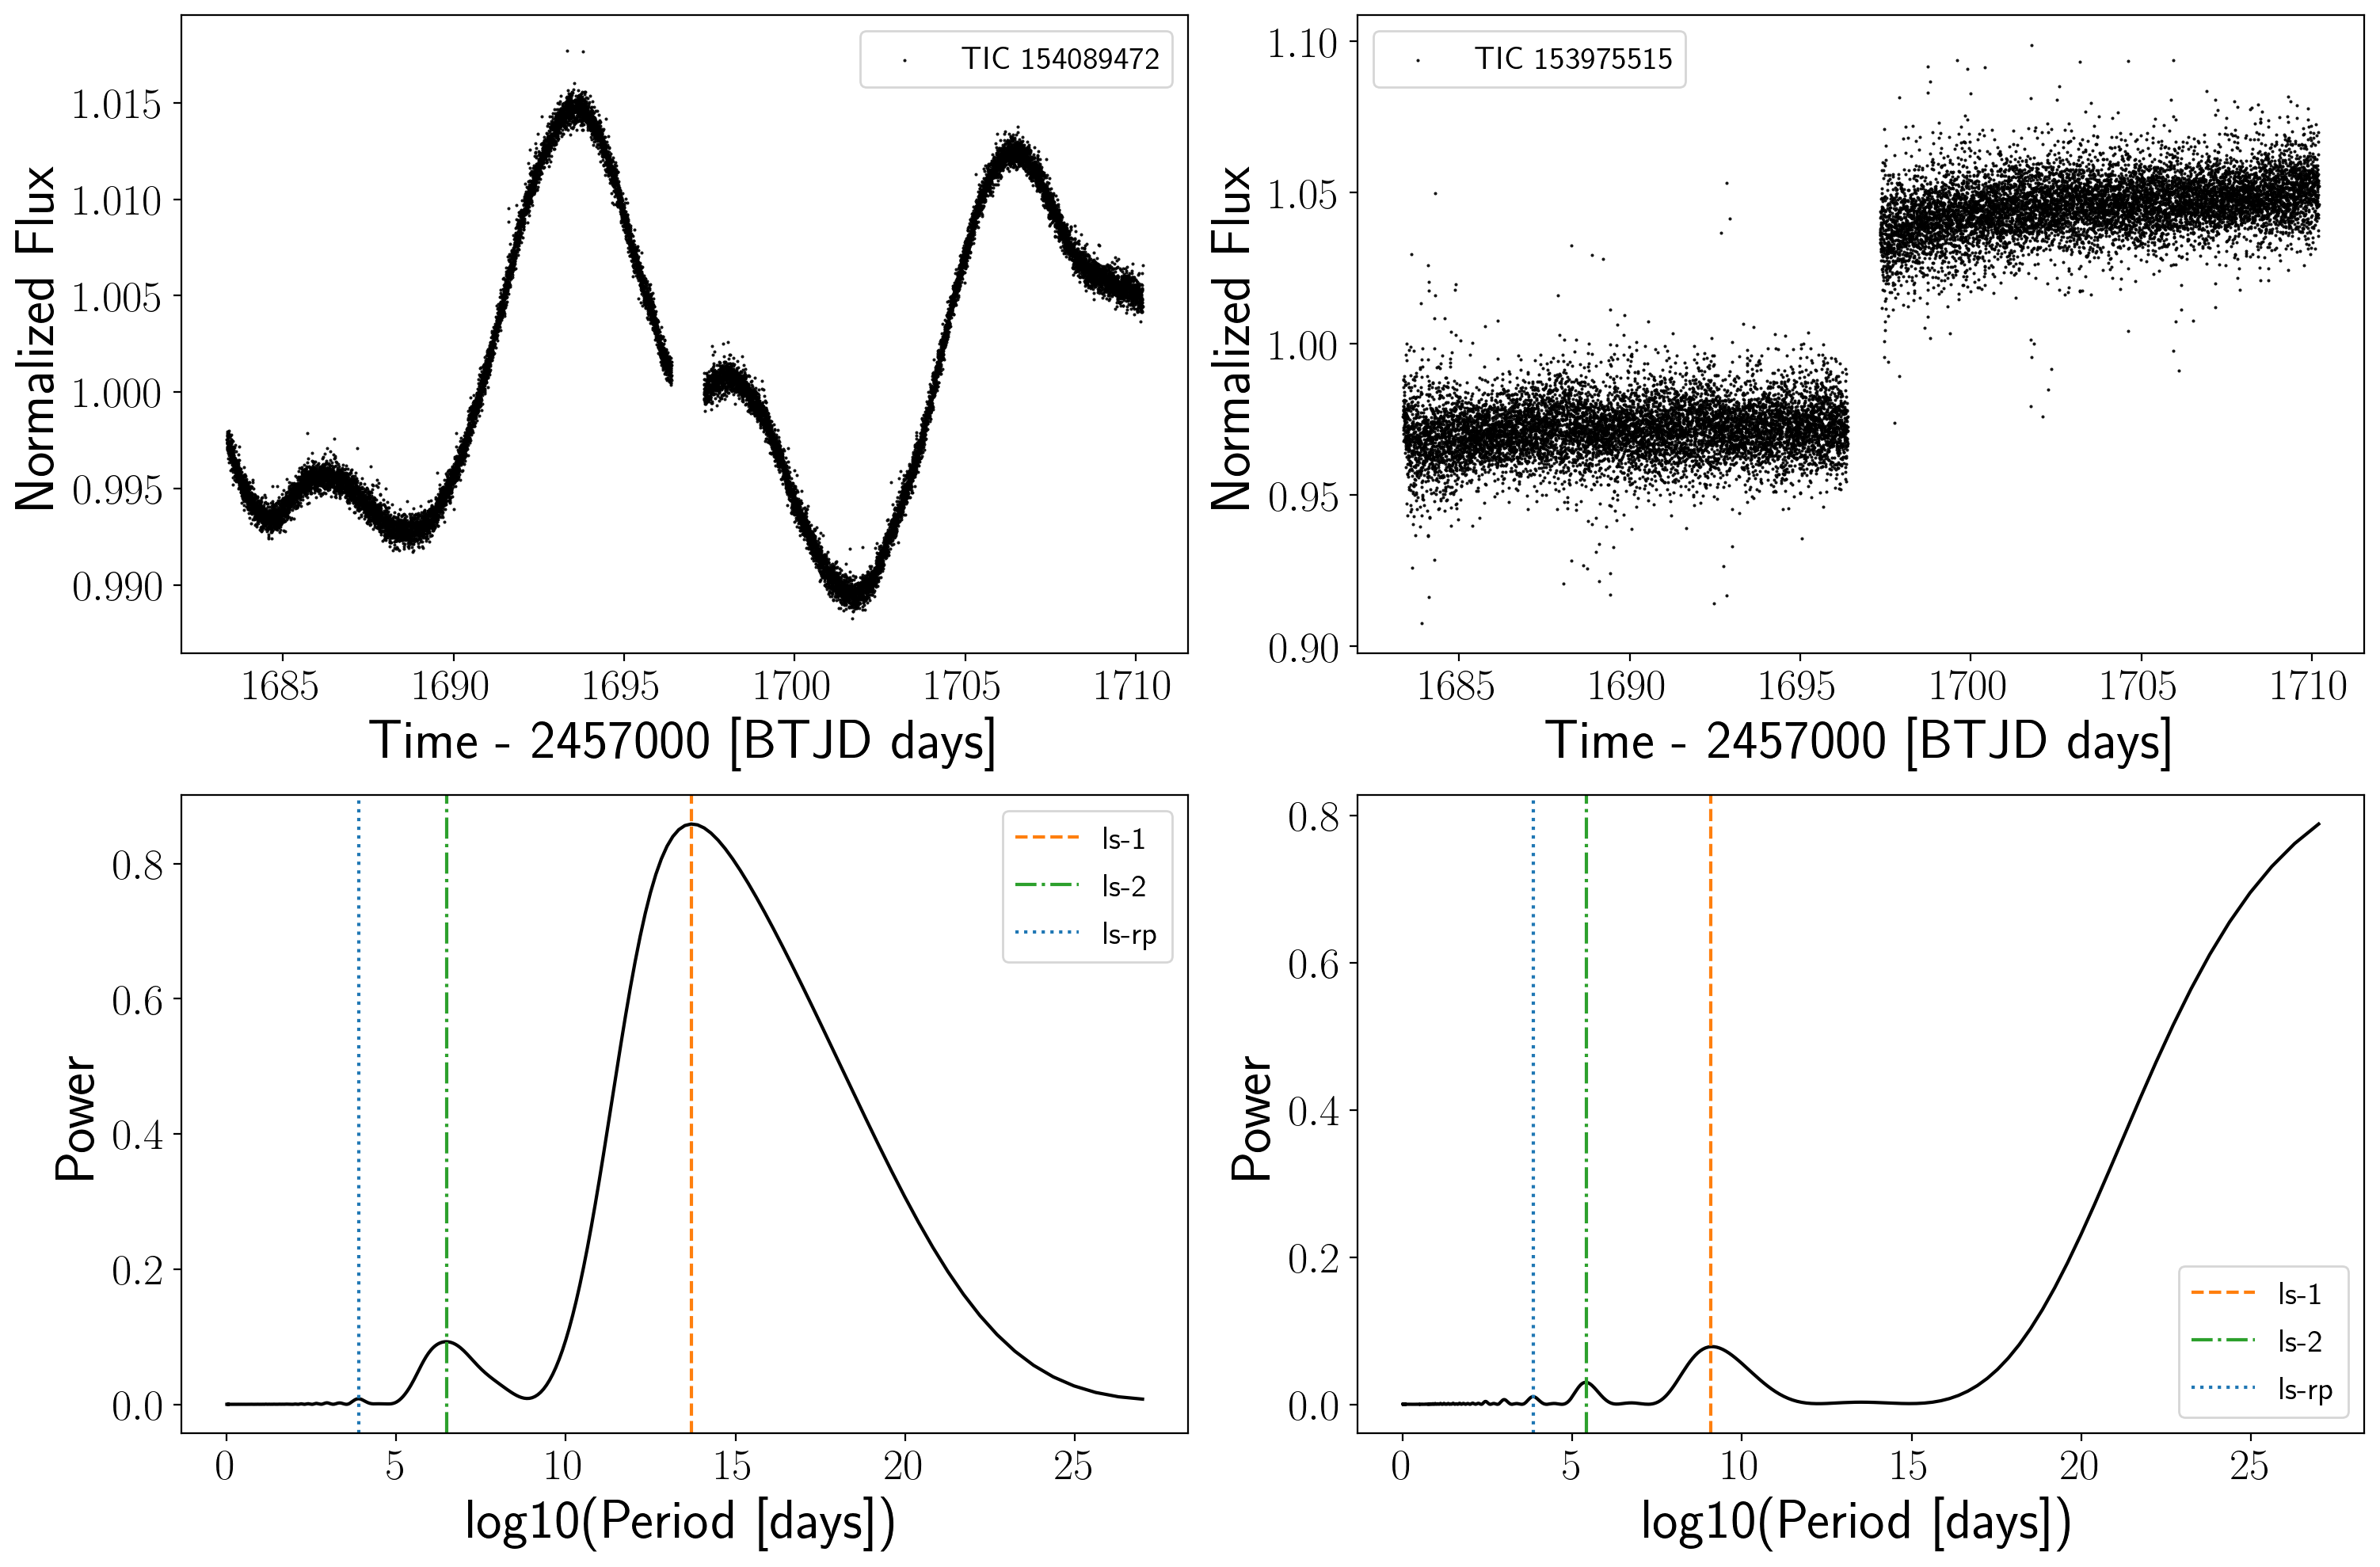

In [5]:
# plot sector lcs & periodograms


#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax1.scatter(variable_lc.time,variable_lc.flux,s=.2,color='k',label = 'TIC {}'.format(variable_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')
ax2.scatter(flat_lc.time,flat_lc.flux,s=.2,color='k',label = 'TIC {}'.format(flat_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')

#pgs
ax3.plot(variable_pg_periods,variable_pg_powers,color='k')
ax3.axvline(variable_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(variable_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(variable_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');
ax4.plot(flat_pg_periods,flat_pg_powers,color='k')
ax4.axvline(flat_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(flat_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(flat_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');

plt.tight_layout()

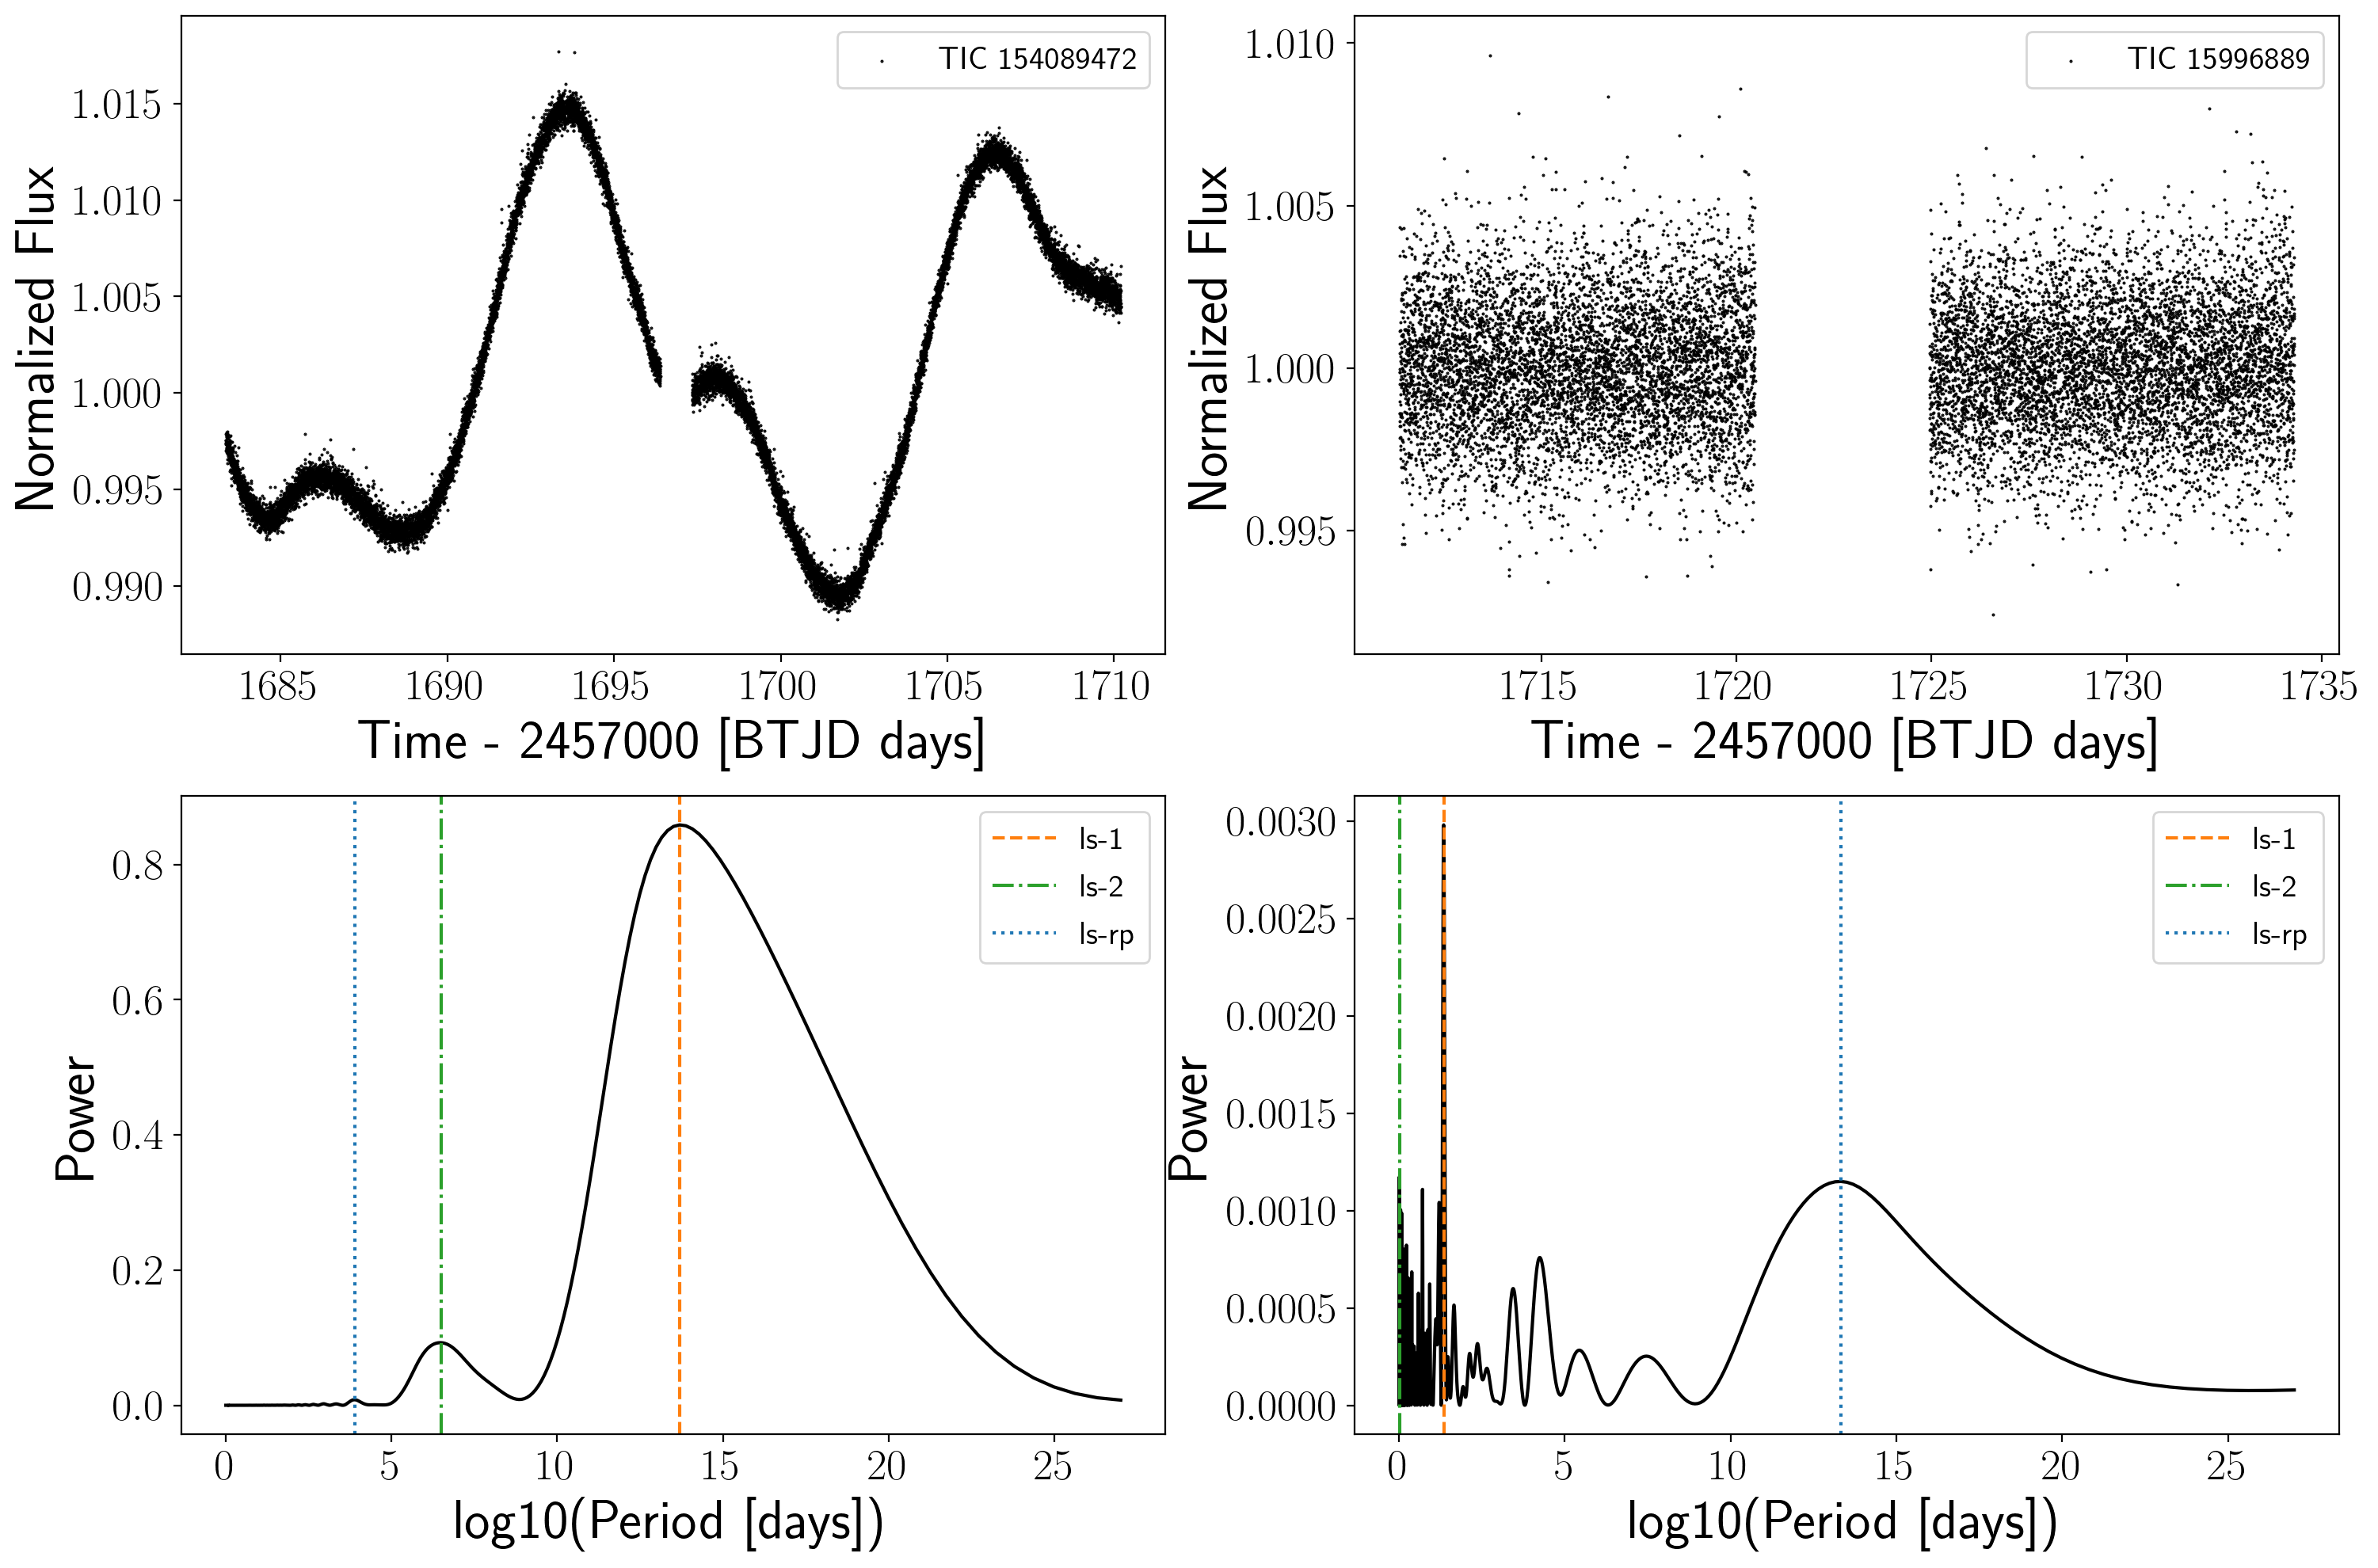

In [6]:
# using a different flat example

#get data for sector lcs & periodograms
## flat target
flat_tic = 15996889 #ramps when restarting 16311292 15
flat_sec = '15'
#open lc data to plot
flat_lcf = lk.open(secpath.format(flat_tic,flat_sec))
flat_lc = flat_lcf.FLUX
#run ls
flat_rotate = ss.RotationModel(flat_lc.time, flat_lc.flux, flat_lc.flux_err) #test if works with flux_err=None or need if/else
flat_ls_period = flat_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
flat_pg_powers = flat_rotate.power
flat_freq = flat_rotate.freq
flat_pg_periods = 1./flat_freq
#df for amps
flat_df = flat[(flat['TIC']==flat_tic) & (flat['Sector']==flat_sec)]
flat_rp1 = flat_df['ls-1'].to_numpy()
flat_rp2 = flat_df['ls-2'].to_numpy()
flat_rp3 = flat_df['ls-3'].to_numpy()
#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax1.scatter(variable_lc.time,variable_lc.flux,s=.2,color='k',label = 'TIC {}'.format(variable_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')
ax2.scatter(flat_lc.time,flat_lc.flux,s=.2,color='k',label = 'TIC {}'.format(flat_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
#pgs
ax3.plot(variable_pg_periods,variable_pg_powers,color='k')
ax3.axvline(variable_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(variable_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(variable_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');
ax4.plot(flat_pg_periods,flat_pg_powers,color='k')
ax4.axvline(flat_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(flat_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(flat_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
plt.tight_layout()


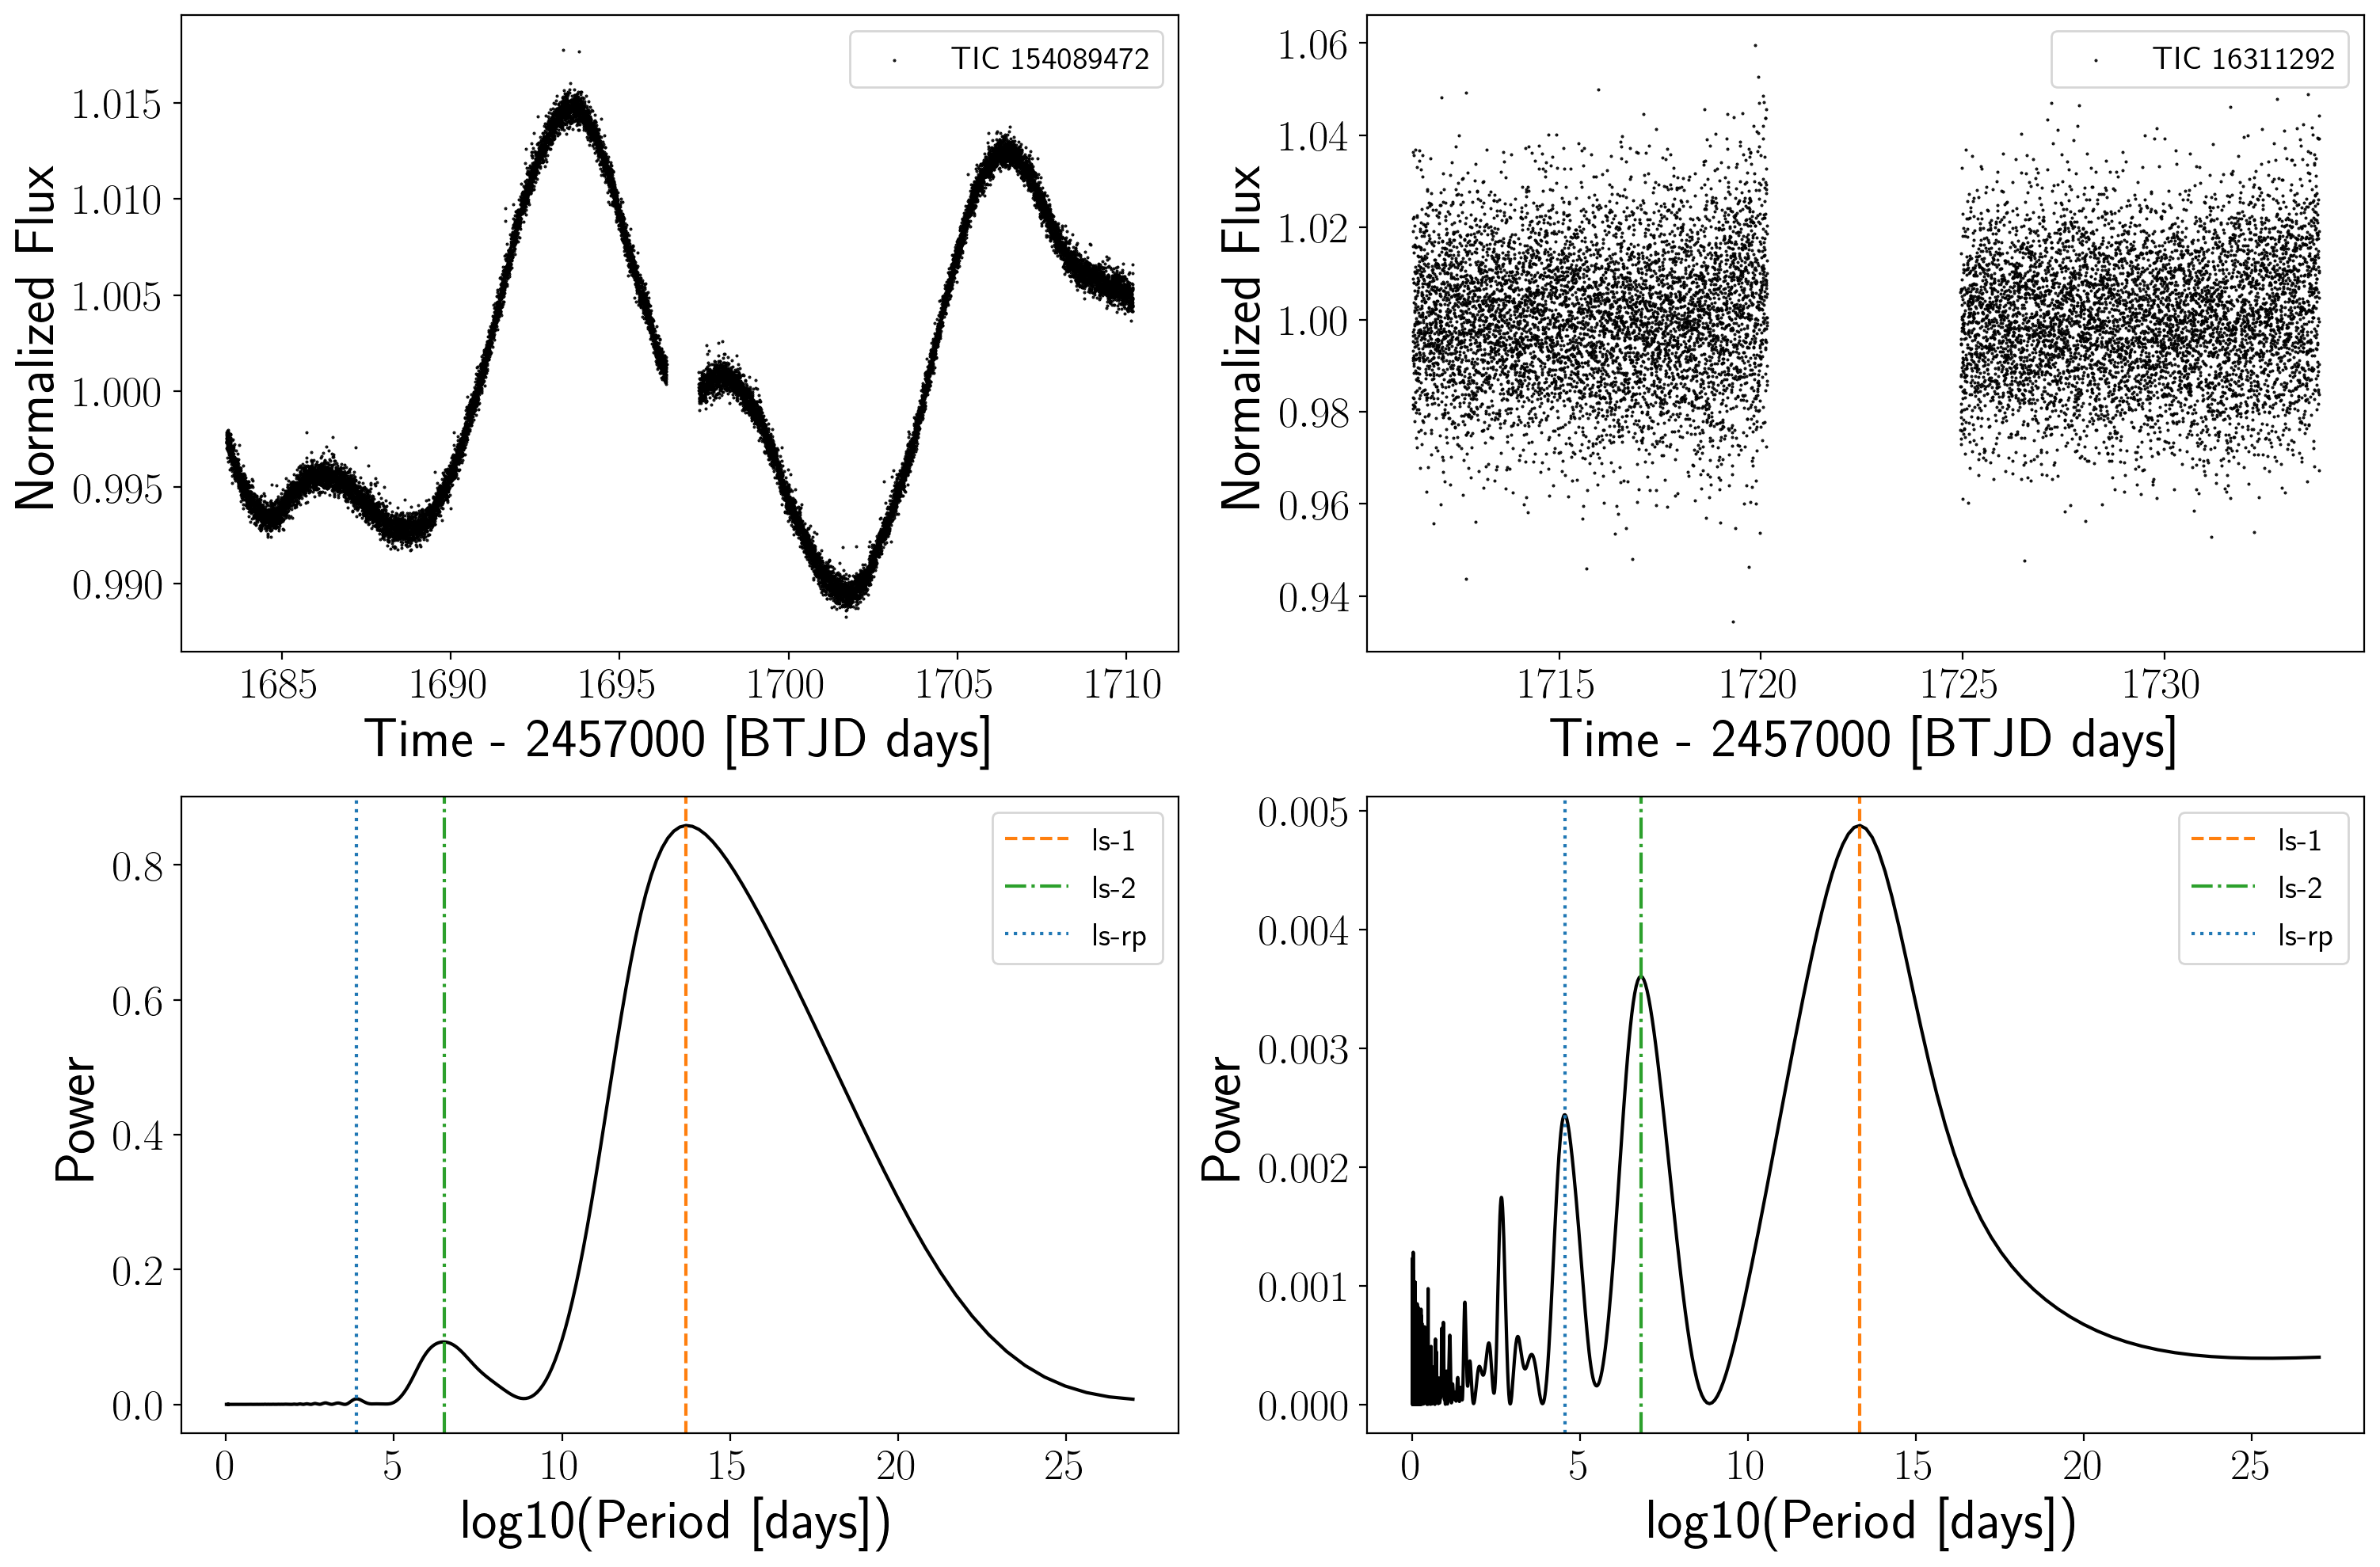

In [7]:
# using another different flat example

#get data for sector lcs & periodograms
## flat target
flat_tic =  16311292 
flat_sec = '15'
#open lc data to plot
flat_lcf = lk.open(secpath.format(flat_tic,flat_sec))
flat_lc = flat_lcf.FLUX
#run ls
flat_rotate = ss.RotationModel(flat_lc.time, flat_lc.flux, flat_lc.flux_err) #test if works with flux_err=None or need if/else
flat_ls_period = flat_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
flat_pg_powers = flat_rotate.power
flat_freq = flat_rotate.freq
flat_pg_periods = 1./flat_freq
#df for amps
flat_df = flat[(flat['TIC']==flat_tic) & (flat['Sector']==flat_sec)]
flat_rp1 = flat_df['ls-1'].to_numpy()
flat_rp2 = flat_df['ls-2'].to_numpy()
flat_rp3 = flat_df['ls-3'].to_numpy()
#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax1.scatter(variable_lc.time,variable_lc.flux,s=.2,color='k',label = 'TIC {}'.format(variable_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')
ax2.scatter(flat_lc.time,flat_lc.flux,s=.2,color='k',label = 'TIC {}'.format(flat_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
#pgs
ax3.plot(variable_pg_periods,variable_pg_powers,color='k')
ax3.axvline(variable_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(variable_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(variable_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');
ax4.plot(flat_pg_periods,flat_pg_powers,color='k')
ax4.axvline(flat_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(flat_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(flat_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
plt.tight_layout()



# Transit vs NO Transit
### for transits - peak amps are very similar
### for no transits - peaks clearly descend

In [8]:
# find good examples


## yes transits target search
# count=0 
# for tic,sec in yestransit[['TIC','Sector']].to_numpy():#[46::]:
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break
##remove b/c flat (ramp up start) 159502670

## no transits target search
# count=0 
# for tic,sec in notransit[['TIC','Sector']].to_numpy():
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break
#remove b/c flat 16835255 sec 15, 
#nice sine way 47579336

In [9]:
#get data for sector lcs & periodograms

## yes transit target
yes_tic = 230114503 #clear EB
yes_sec = '18'
#open lc data to plot
yes_lcf = lk.open(secpath.format(yes_tic,yes_sec))
yes_lc = yes_lcf.FLUX
#run ls
yes_rotate = ss.RotationModel(yes_lc.time, yes_lc.flux, yes_lc.flux_err) #test if works with flux_err=None or need if/else
yes_ls_period = yes_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
yes_pg_powers = yes_rotate.power
yes_freq = yes_rotate.freq
yes_pg_periods = 1./yes_freq
#df for amps
yes_df = yestransit[(yestransit['TIC']==yes_tic) & (yestransit['Sector']==yes_sec)]
yes_rp1 = yes_df['ls-1'].to_numpy()
yes_rp2 = yes_df['ls-2'].to_numpy()
yes_rp3 = yes_df['ls-3'].to_numpy()

## no transit target
no_tic = 26414266
no_sec = '15'
#open lc data to plot
no_lcf = lk.open(secpath.format(no_tic,no_sec))
no_lc = no_lcf.FLUX
#run ls
no_rotate = ss.RotationModel(no_lc.time, no_lc.flux, no_lc.flux_err) #test if works with flux_err=None or need if/else
no_ls_period = no_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
no_pg_powers = no_rotate.power
no_freq = no_rotate.freq
no_pg_periods = 1./no_freq
#df for amps
no_df = notransit[(notransit['TIC']==no_tic) & (notransit['Sector']==no_sec)]
no_rp1 = no_df['ls-1'].to_numpy()
no_rp2 = no_df['ls-2'].to_numpy()
no_rp3 = no_df['ls-3'].to_numpy()



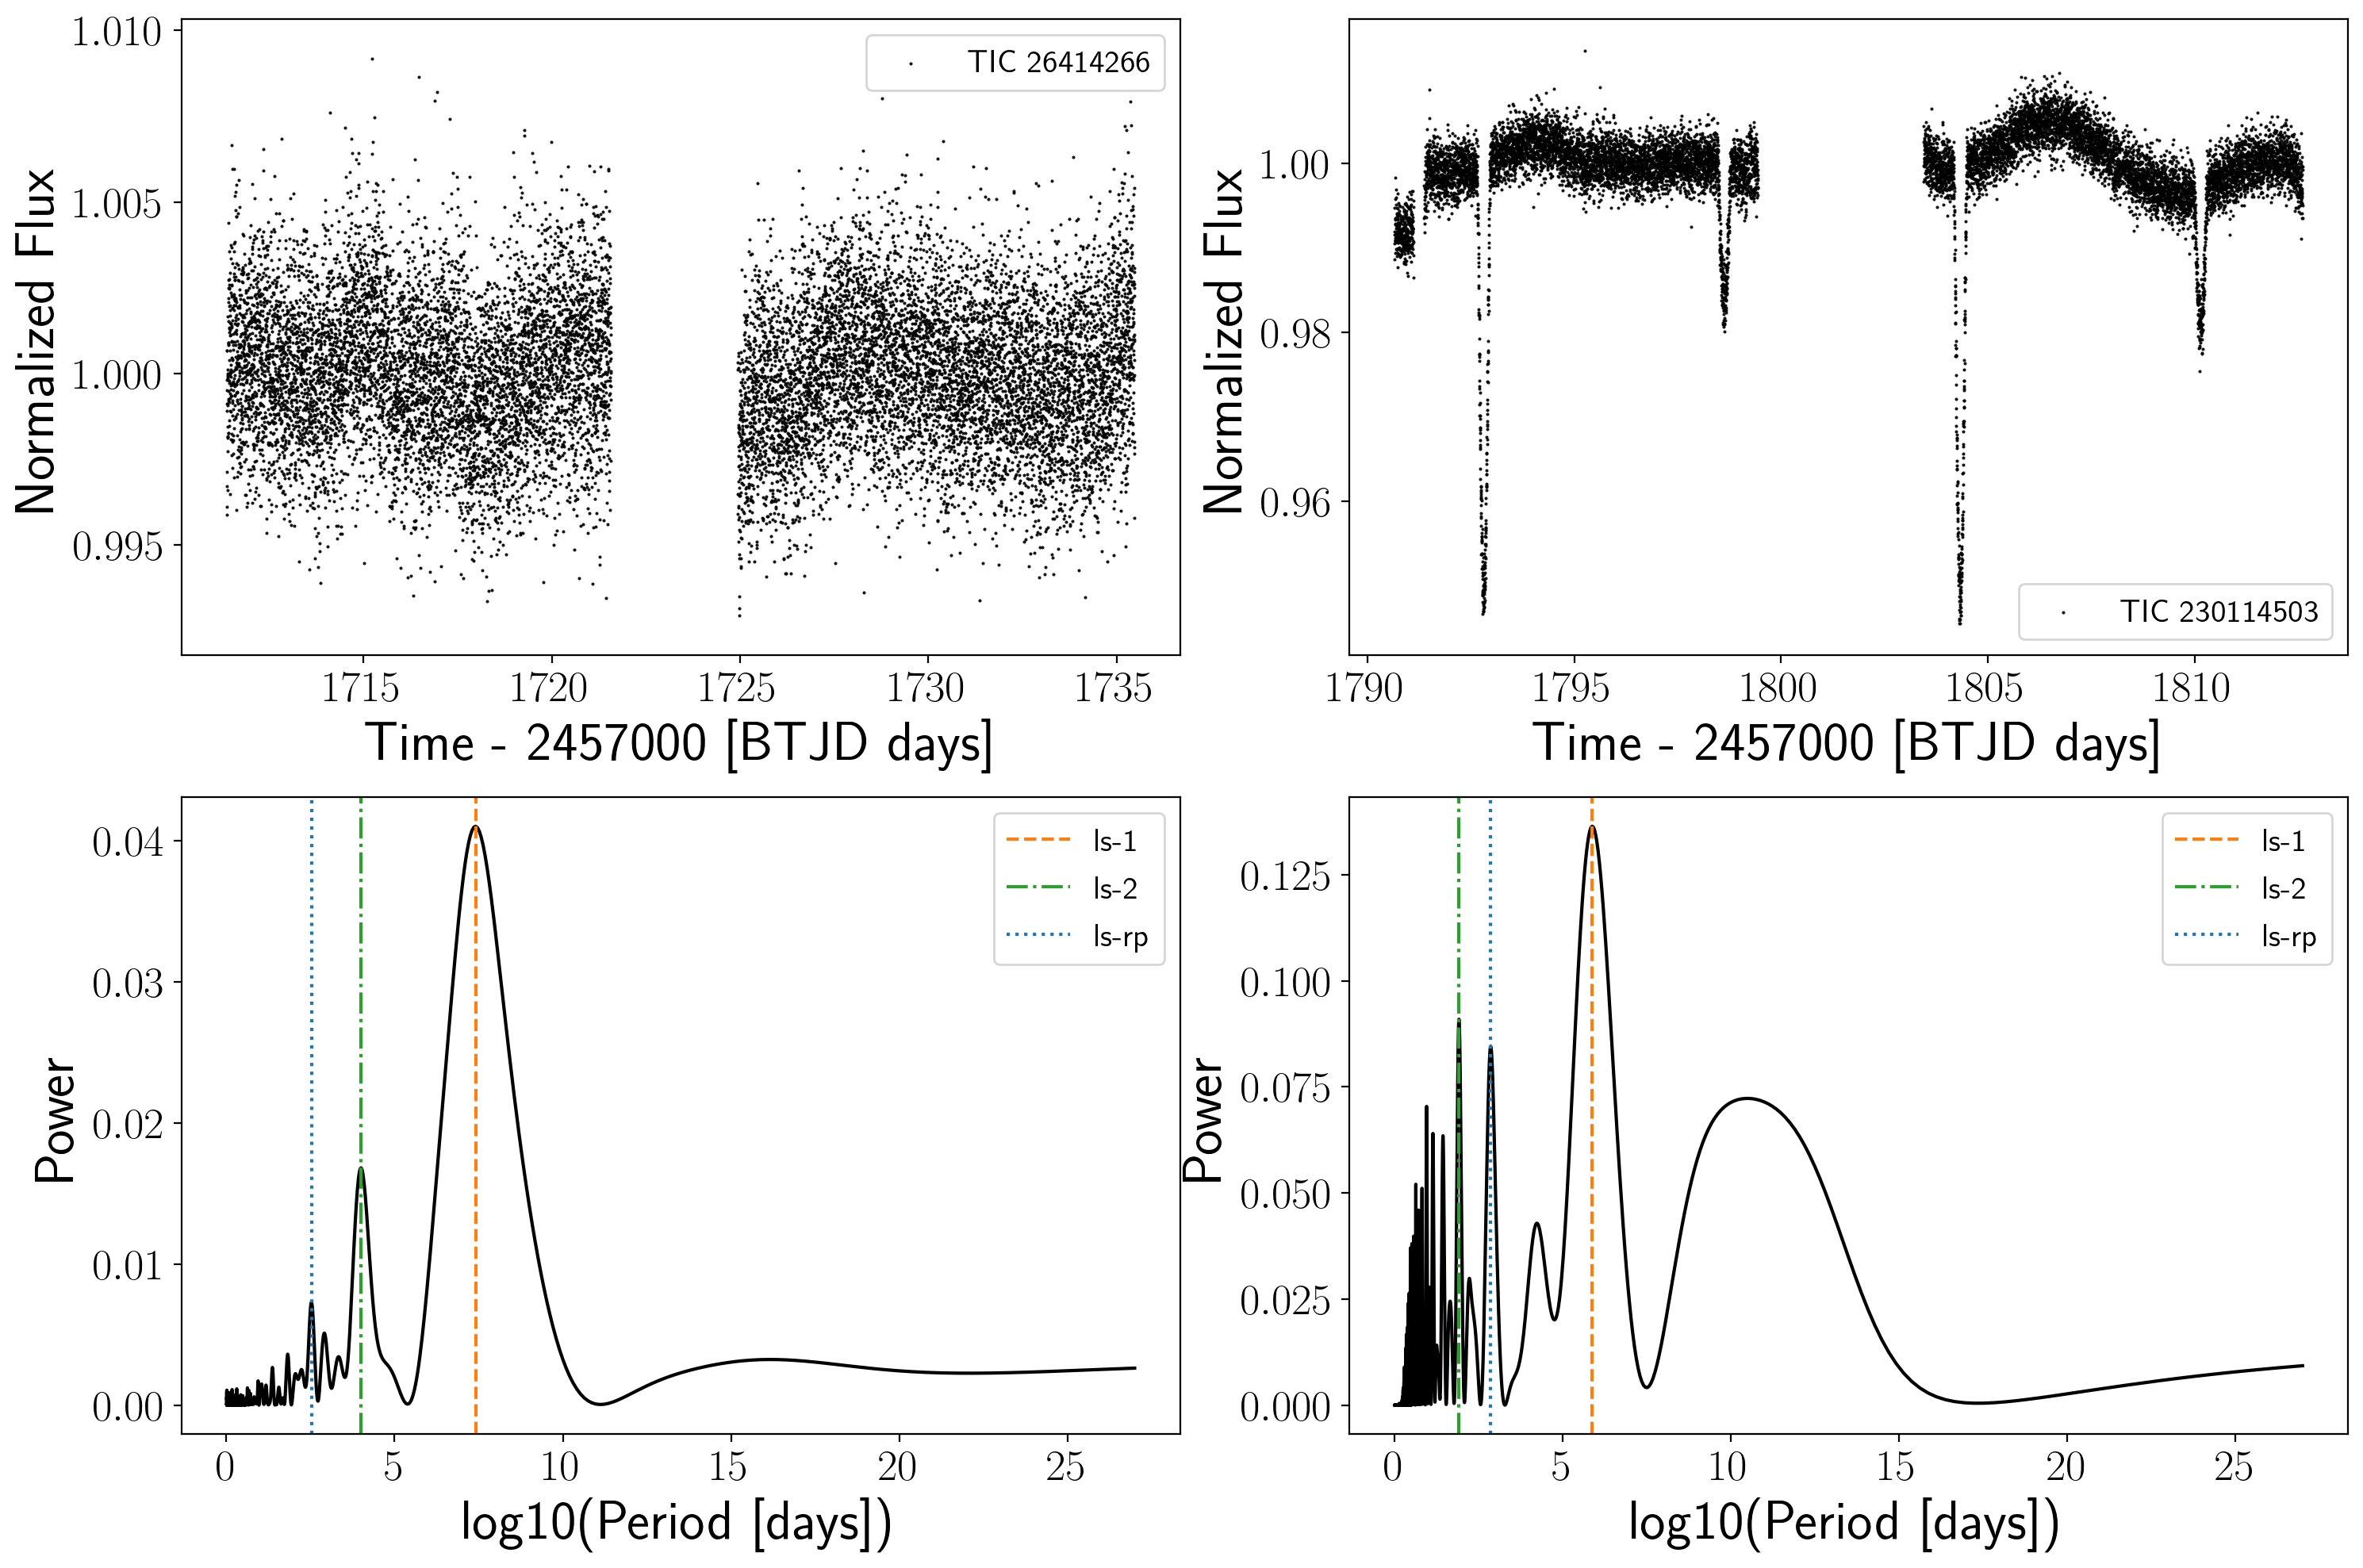

In [10]:
# plot sector lcs & periodograms


#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax2.scatter(yes_lc.time,yes_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
ax1.scatter(no_lc.time,no_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')

#pgs
ax4.plot(yes_pg_periods,yes_pg_powers,color='k')
ax4.axvline(yes_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(yes_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(yes_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
ax3.plot(no_pg_periods,no_pg_powers,color='k')
ax3.axvline(no_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(no_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(no_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');

plt.tight_layout()

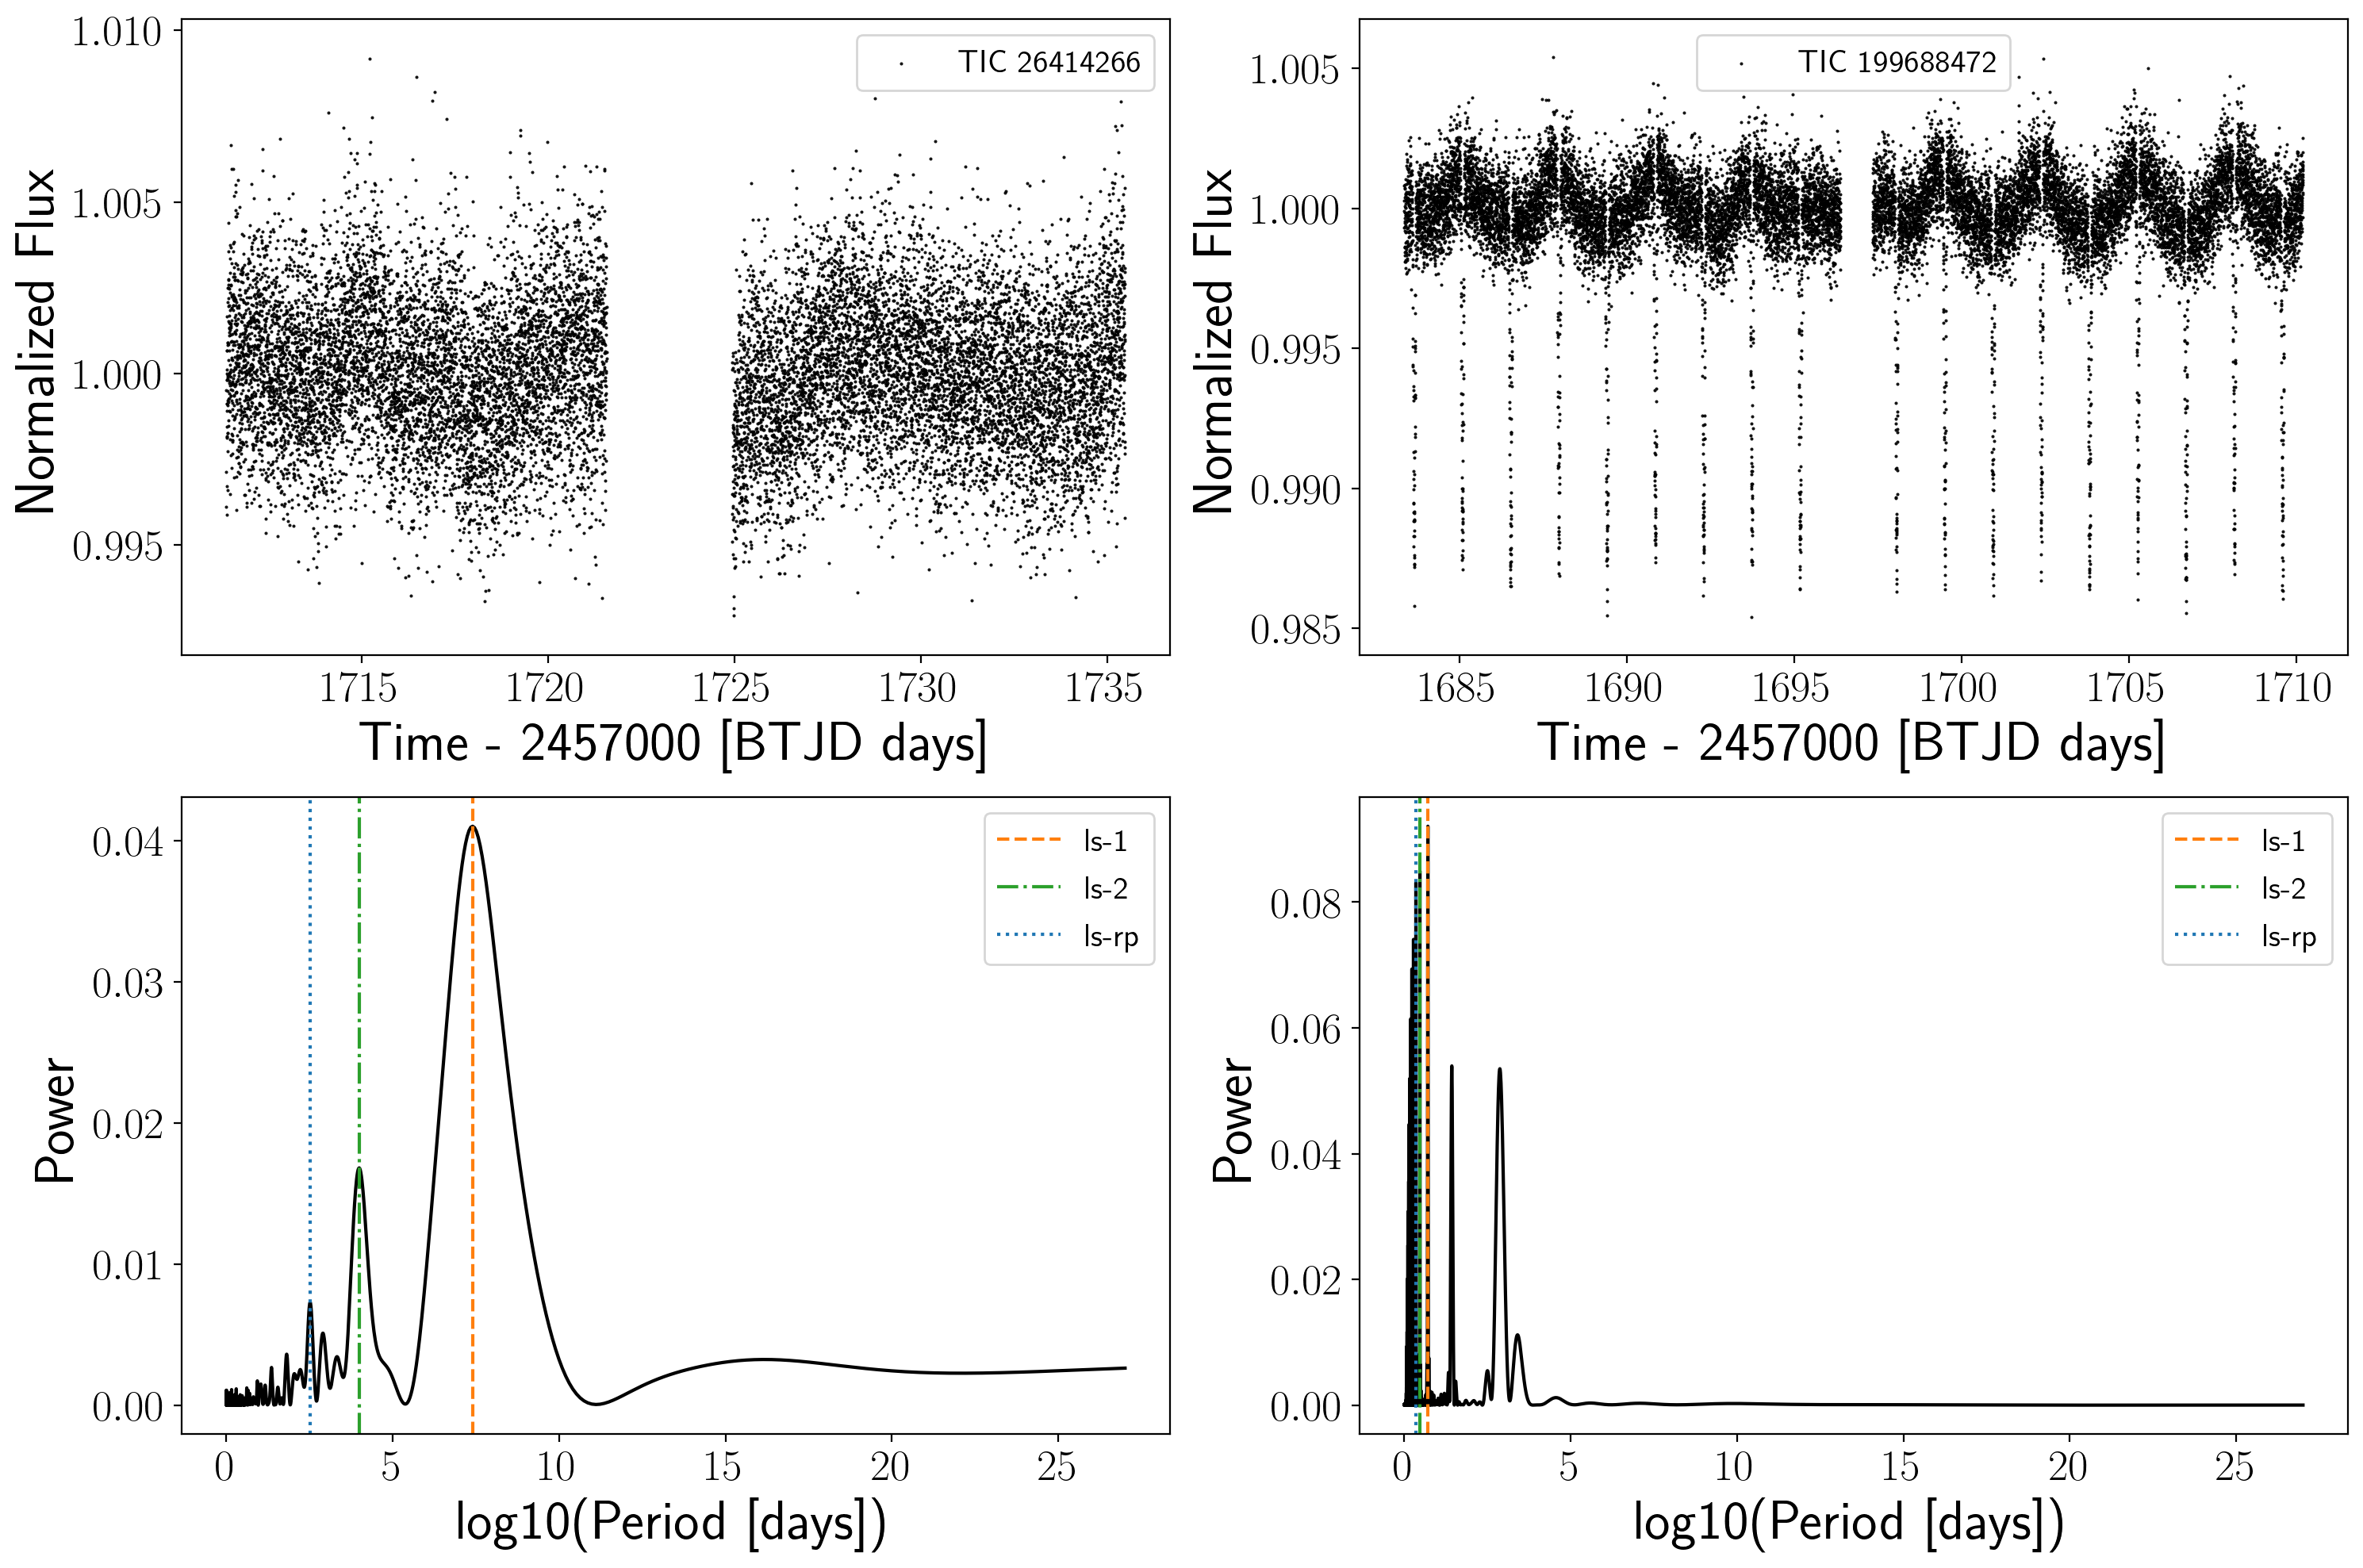

In [11]:
# using a different yes transit example

#get data for sector lcs & periodograms
## yes transit target
yes_tic = 199688472 #known TOI
yes_sec = '14'
#open lc data to plot
yes_lcf = lk.open(secpath.format(yes_tic,yes_sec))
yes_lc = yes_lcf.FLUX
#run ls
yes_rotate = ss.RotationModel(yes_lc.time, yes_lc.flux, yes_lc.flux_err) #test if works with flux_err=None or need if/else
yes_ls_period = yes_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
yes_pg_powers = yes_rotate.power
yes_freq = yes_rotate.freq
yes_pg_periods = 1./yes_freq
#df for amps
yes_df = yestransit[(yestransit['TIC']==yes_tic) & (yestransit['Sector']==yes_sec)]
yes_rp1 = yes_df['ls-1'].to_numpy()[0]#[0] b/c need to clean up train set, this is listed twice
yes_rp2 = yes_df['ls-2'].to_numpy()[0]
yes_rp3 = yes_df['ls-3'].to_numpy()[0]
#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax2.scatter(yes_lc.time,yes_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
ax1.scatter(no_lc.time,no_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')

#pgs
ax4.plot(yes_pg_periods,yes_pg_powers,color='k')
ax4.axvline(yes_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(yes_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(yes_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
ax3.plot(no_pg_periods,no_pg_powers,color='k')
ax3.axvline(no_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(no_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(no_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');

plt.tight_layout()


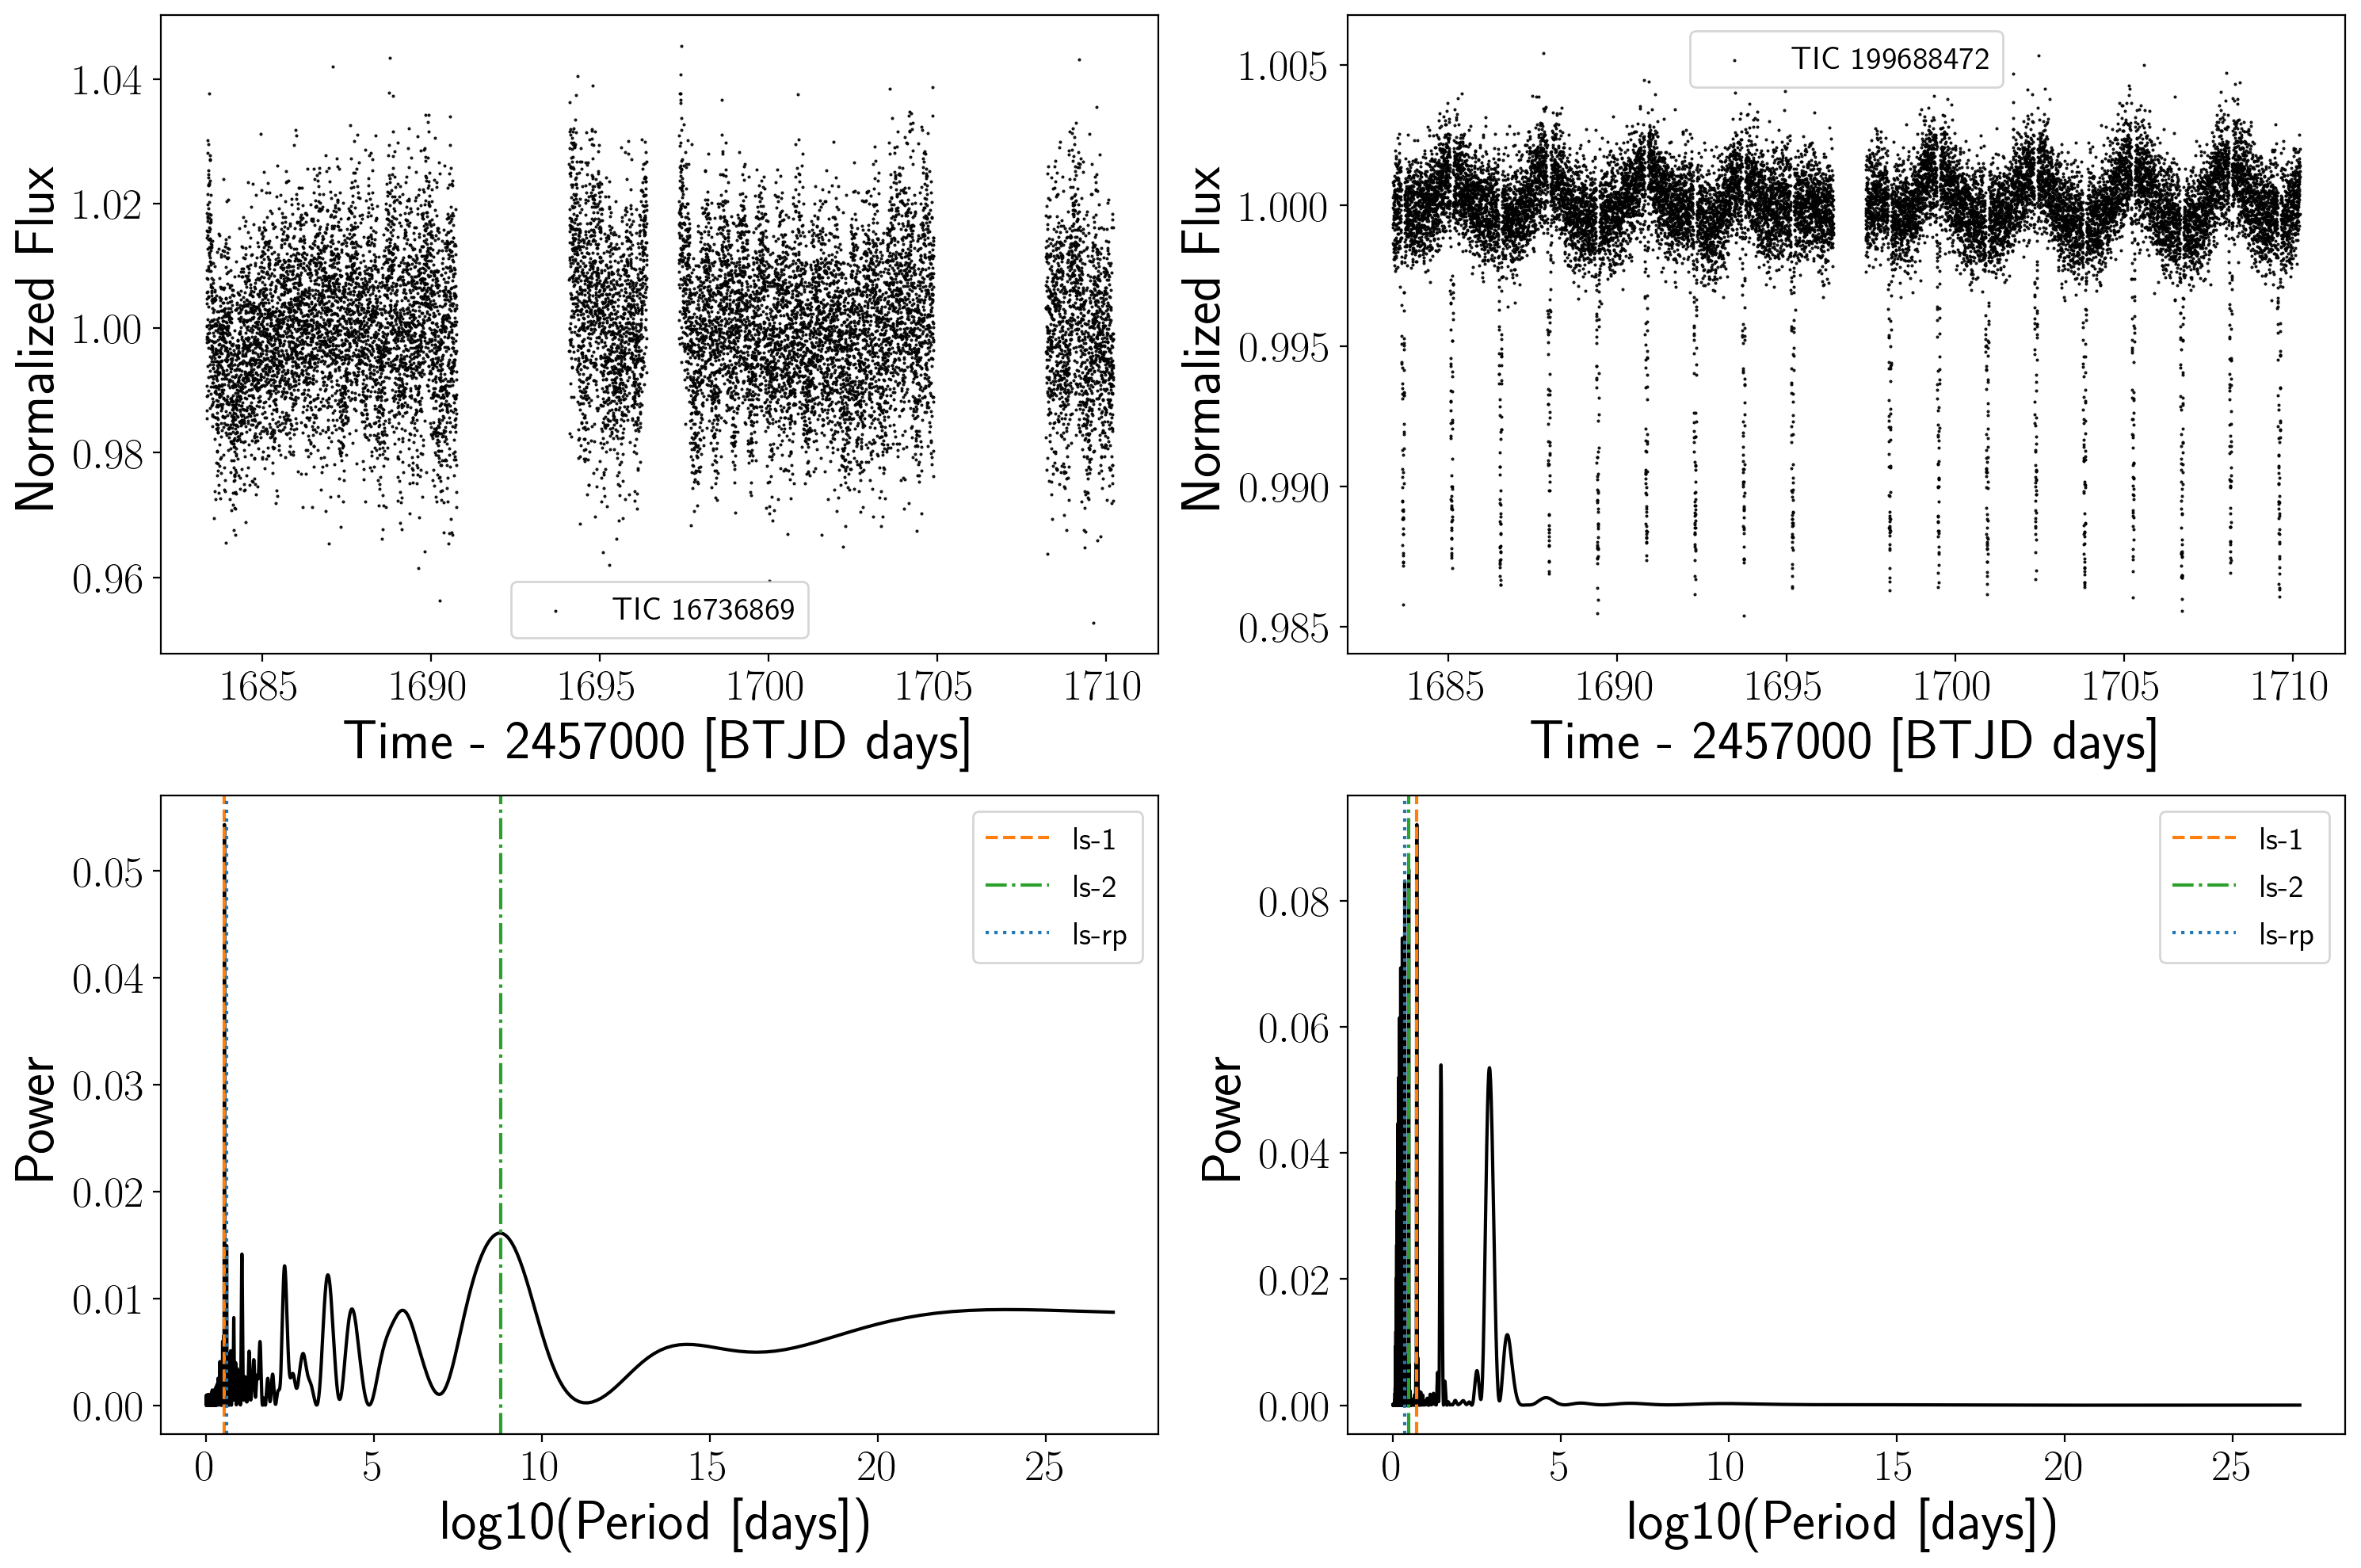

In [12]:
# using a different no transit example

#get data for sector lcs & periodograms
## yes transit target
no_tic = 16736869  #2
no_sec = '14'
#open lc data to plot
no_lcf = lk.open(secpath.format(no_tic,no_sec))
no_lc = no_lcf.FLUX
#run ls
no_rotate = ss.RotationModel(no_lc.time, no_lc.flux, no_lc.flux_err) #test if works with flux_err=None or need if/else
no_ls_period = no_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
no_pg_powers = no_rotate.power
no_freq = no_rotate.freq
no_pg_periods = 1./no_freq
#df for amps
no_df = notransit[(notransit['TIC']==no_tic) & (notransit['Sector']==no_sec)]
no_rp1 = no_df['ls-1'].to_numpy()[0]#[0] b/c need to clean up train set, this is listed twice
no_rp2 = no_df['ls-2'].to_numpy()[0]
no_rp3 = no_df['ls-3'].to_numpy()[0]
#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax2.scatter(yes_lc.time,yes_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
ax1.scatter(no_lc.time,no_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')

#pgs
ax4.plot(yes_pg_periods,yes_pg_powers,color='k')
ax4.axvline(yes_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(yes_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(yes_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
ax3.plot(no_pg_periods,no_pg_powers,color='k')
ax3.axvline(no_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(no_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(no_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');

plt.tight_layout()



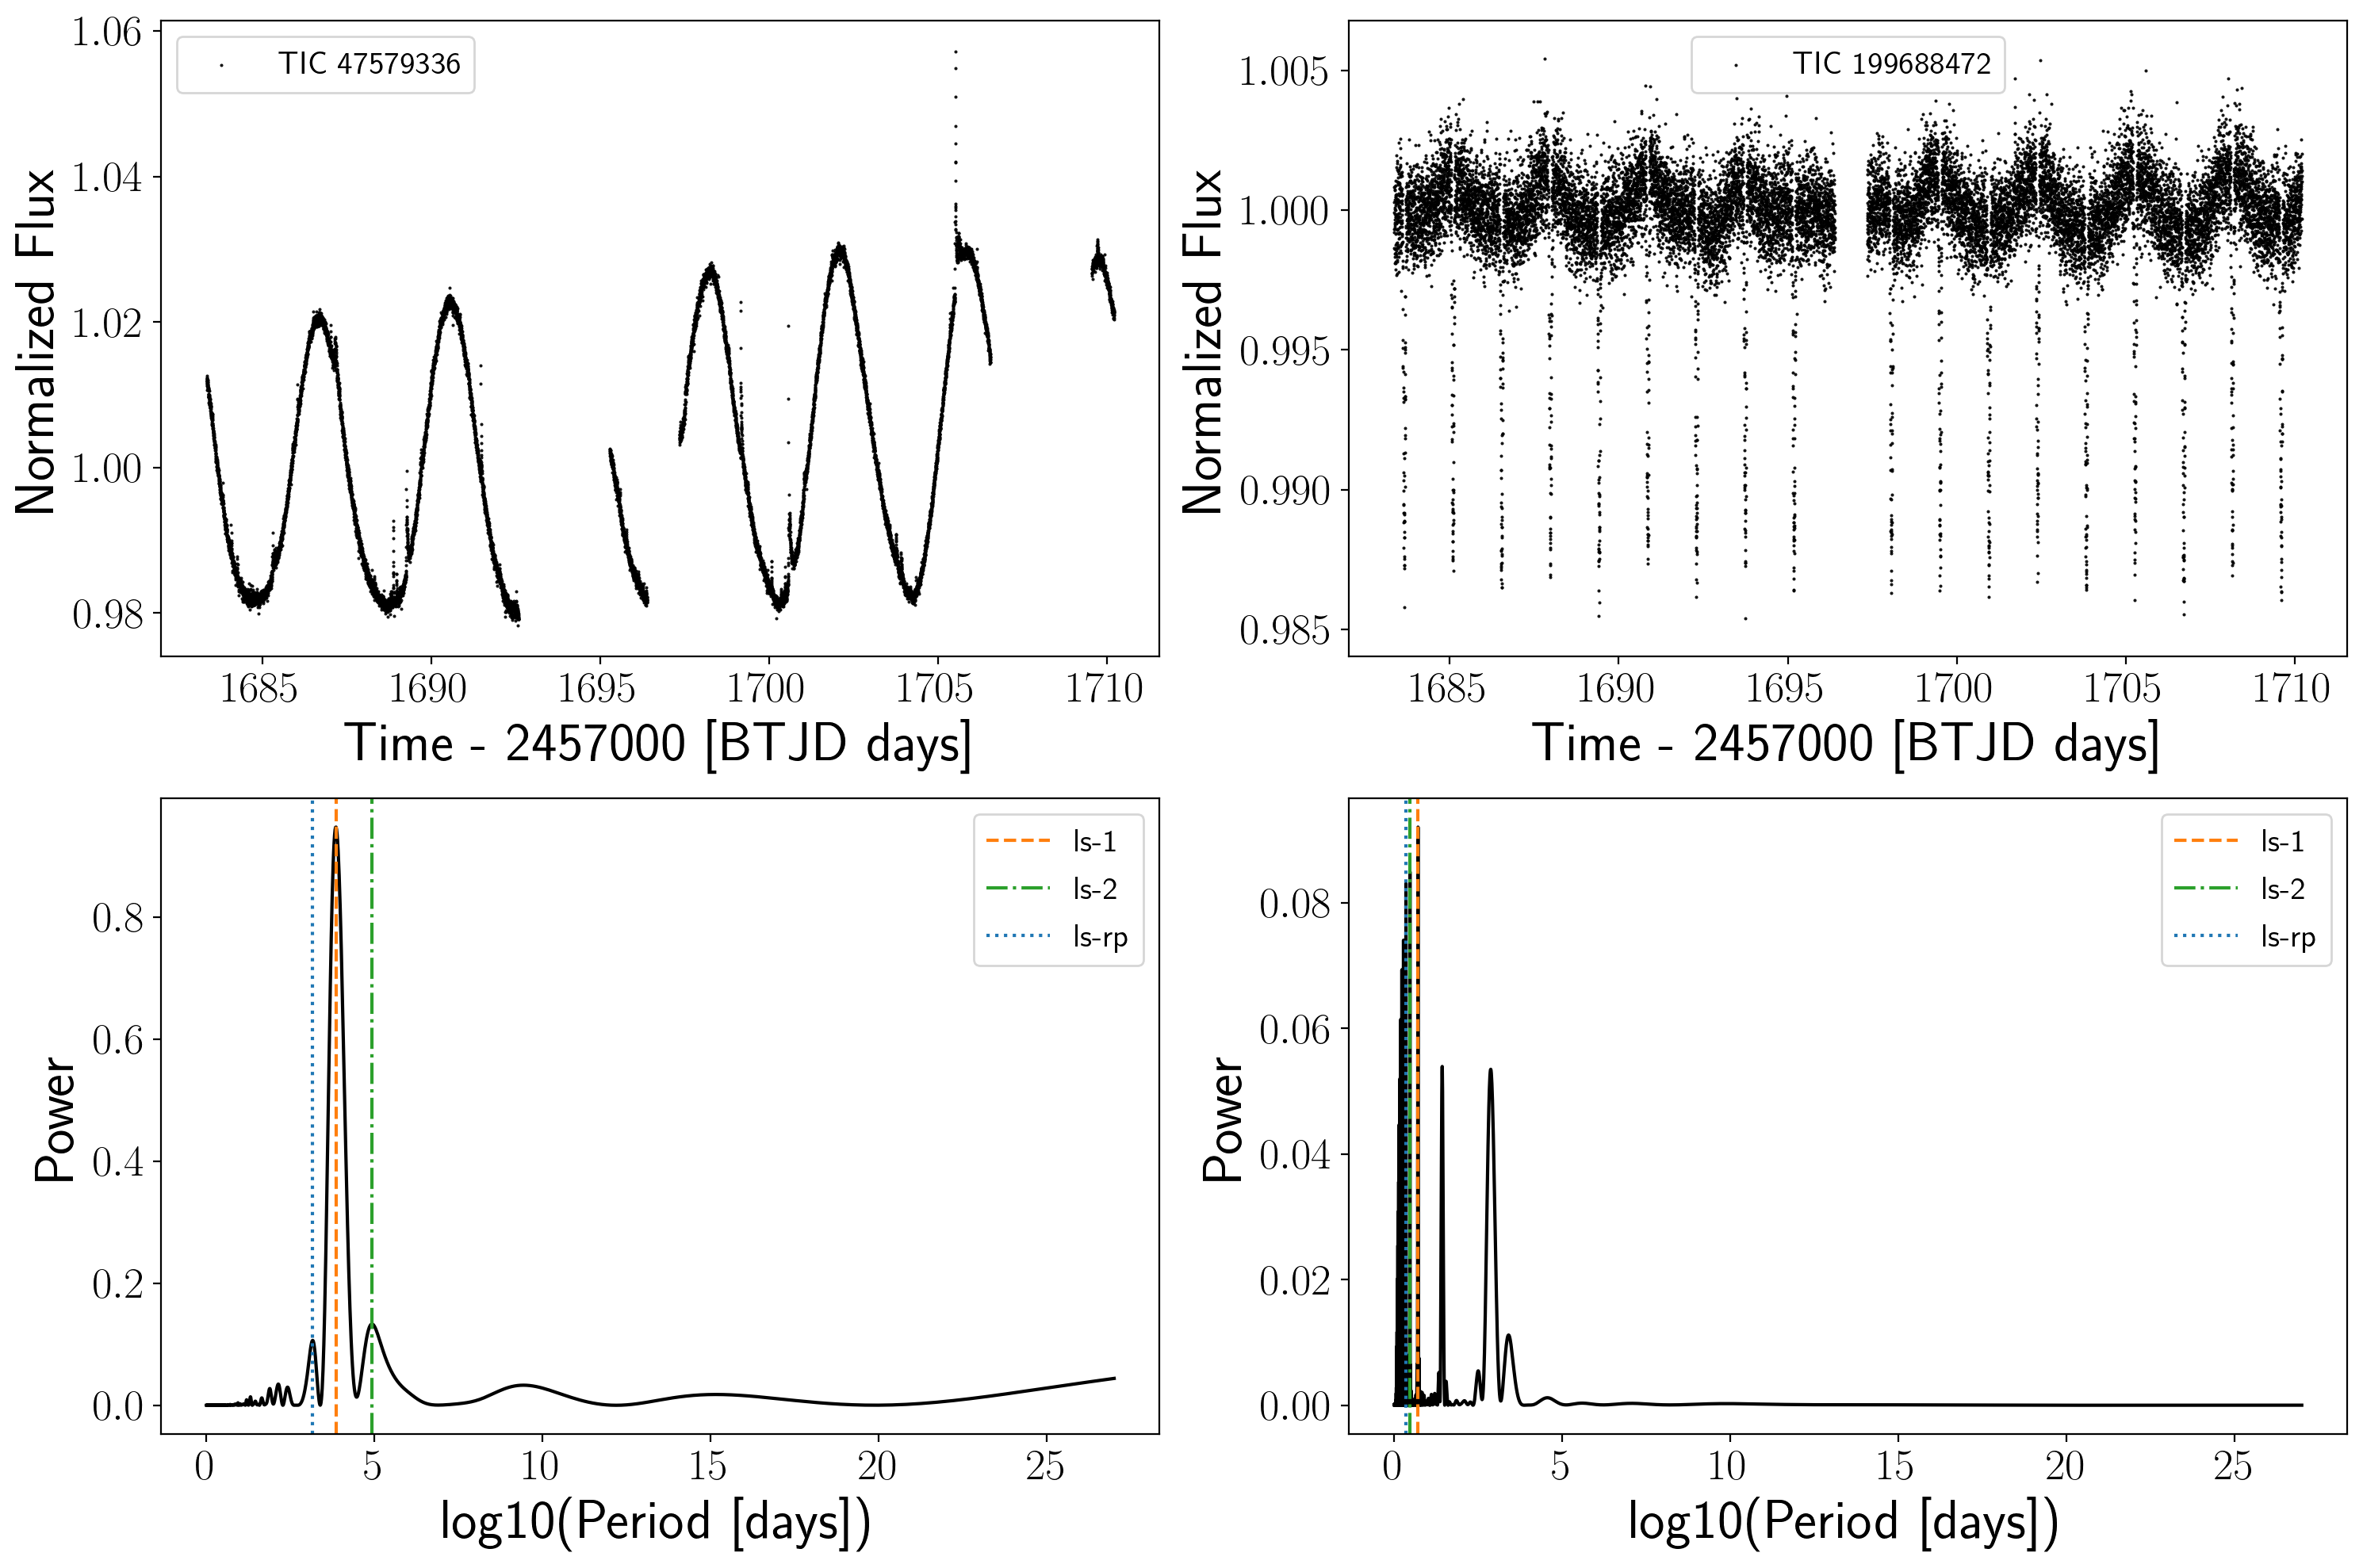

In [13]:
# 47579336 14 #clear sine
# 16736869 14 #rapid rotator
# 26414101 14 #really small amp variation in lc but can see signal .001 in lc
# 26419206 14 #kinda flat but can see signal .001 in lc---dont use not clear re: point in paper
# 26414266 14 #had higher modulation but kinda flat can see signal .005 in lc

# using a different no transit example

#get data for sector lcs & periodograms
## yes transit target
no_tic = 47579336 
no_sec = '14'
#open lc data to plot
no_lcf = lk.open(secpath.format(no_tic,no_sec))
no_lc = no_lcf.FLUX
#run ls
no_rotate = ss.RotationModel(no_lc.time, no_lc.flux, no_lc.flux_err) #test if works with flux_err=None or need if/else
no_ls_period = no_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
no_pg_powers = no_rotate.power
no_freq = no_rotate.freq
no_pg_periods = 1./no_freq
#df for amps
no_df = notransit[(notransit['TIC']==no_tic) & (notransit['Sector']==no_sec)]
no_rp1 = no_df['ls-1'].to_numpy()[0]#[0] b/c need to clean up train set, this is listed twice
no_rp2 = no_df['ls-2'].to_numpy()[0]
no_rp3 = no_df['ls-3'].to_numpy()[0]
#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax2.scatter(yes_lc.time,yes_lc.flux,s=.2,color='k',label = 'TIC {}'.format(yes_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')
ax1.scatter(no_lc.time,no_lc.flux,s=.2,color='k',label = 'TIC {}'.format(no_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')

#pgs
ax4.plot(yes_pg_periods,yes_pg_powers,color='k')
ax4.axvline(yes_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(yes_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(yes_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');
ax3.plot(no_pg_periods,no_pg_powers,color='k')
ax3.axvline(no_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(no_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(no_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');

plt.tight_layout()


# Accurate VS Inaccurate

In [14]:
# find good examples


## accurate target search
# count=0 
# for tic,sec in accurate[['TIC','Sector']].to_numpy():#[46::]:
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break


## inaccurate target search
# count=0 
# for tic,sec in inaccurate[['TIC','Sector']].to_numpy():
#     try:
#         thepath = secpath.format(tic,sec)
#         lcf = lk.open(thepath)
#         lc = lcf.FLUX
#         lc.scatter()
#         print('Plot {}:'.format(count),tic,sec)
#         count+=1
#     except FileNotFoundError:
#         pass
#     if count == 19:#to avoid too many plots
#         break


In [15]:
#get data for sector lcs & periodograms

## accurate target
accurate_tic = 27773745 #agreed with MQ rp
accurate_sec = '14'
accurate_sec2 = '14.0'
#open lc data to plot
accurate_lcf = lk.open(secpath.format(accurate_tic,accurate_sec))
accurate_lc = accurate_lcf.FLUX
#run ls
accurate_rotate = ss.RotationModel(accurate_lc.time, accurate_lc.flux, accurate_lc.flux_err) #test if works with flux_err=None or need if/else
accurate_ls_period = accurate_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
accurate_pg_powers = accurate_rotate.power
accurate_freq = accurate_rotate.freq
accurate_pg_periods = 1./accurate_freq
#df for amps
accurate_df = accurate[(accurate['TIC']==accurate_tic) & (accurate['Sector']==accurate_sec2)]
accurate_rp1 = accurate_df['ls-1'].to_numpy()
accurate_rp2 = accurate_df['ls-2'].to_numpy()
accurate_rp3 = accurate_df['ls-3'].to_numpy()

## inaccurate target
inaccurate_tic = 272785710 #ncvz stitched where sectors dont have a majority agreement
inaccurate_sec = '20'
# inaccurate_sec2 = '15.0'
#open lc data to plot
inaccurate_lcf = lk.open(secpath.format(inaccurate_tic,inaccurate_sec))
inaccurate_lc = inaccurate_lcf.FLUX
#run ls
inaccurate_rotate = ss.RotationModel(inaccurate_lc.time, inaccurate_lc.flux, inaccurate_lc.flux_err) #test if works with flux_err=None or need if/else
inaccurate_ls_period = inaccurate_rotate.ls_rotation(min_period=.01 , max_period=27.) #rp1 #amend min/max periods to check for here, it will carry to freq below
inaccurate_pg_powers = inaccurate_rotate.power
inaccurate_freq = inaccurate_rotate.freq
inaccurate_pg_periods = 1./inaccurate_freq
#df for amps
inaccurate_df = inaccurate[(inaccurate['TIC']==inaccurate_tic) & (inaccurate['Sector']==inaccurate_sec)]
inaccurate_rp1 = inaccurate_df['ls-1'].to_numpy()
inaccurate_rp2 = inaccurate_df['ls-2'].to_numpy()
inaccurate_rp3 = inaccurate_df['ls-3'].to_numpy()




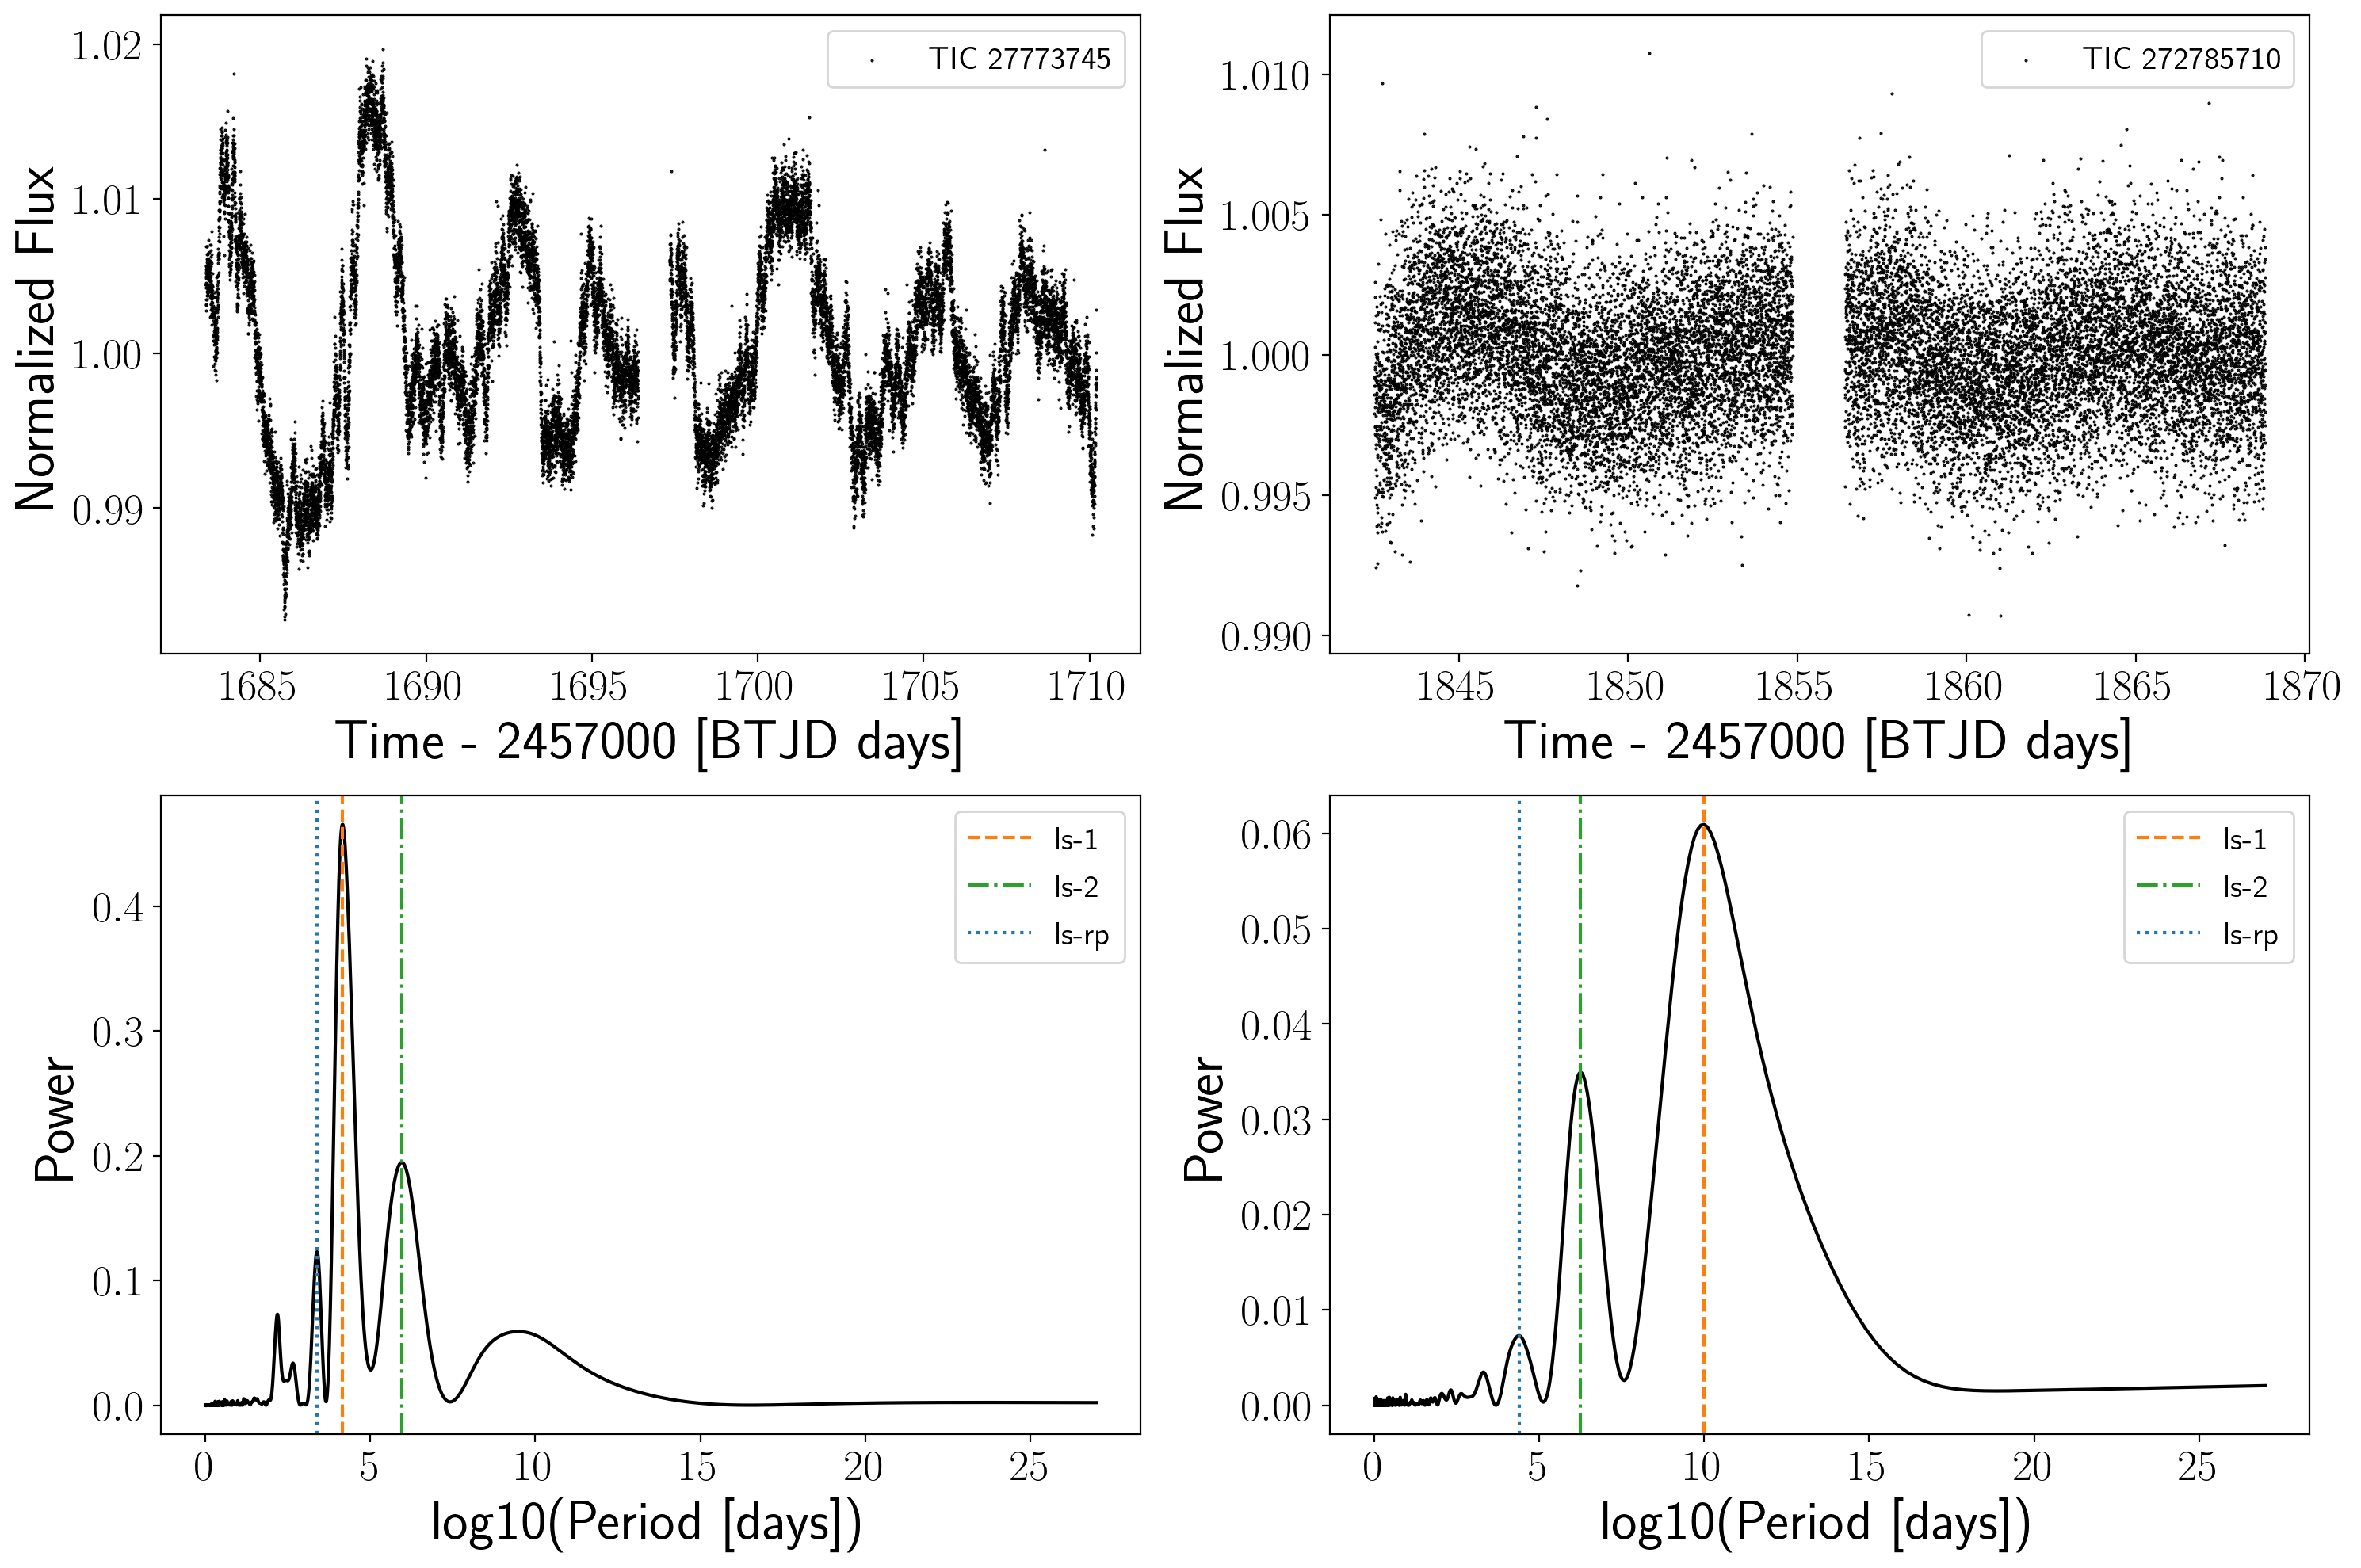

In [16]:
# plot sector lcs & periodograms


#plot
fig, ([ax1,ax2],[ax3,ax4])  = plt.subplots(2,2, figsize=(15,10),dpi=200)
#lcs
ax1.scatter(accurate_lc.time,accurate_lc.flux,s=.2,color='k',label = 'TIC {}'.format(accurate_tic))
ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time - 2457000 [BTJD days]')
ax1.legend(fontsize='x-large')
ax2.scatter(inaccurate_lc.time,inaccurate_lc.flux,s=.2,color='k',label = 'TIC {}'.format(inaccurate_tic))
ax2.set_ylabel('Normalized Flux')
ax2.set_xlabel('Time - 2457000 [BTJD days]')
ax2.legend(fontsize='x-large')

#pgs
ax3.plot(accurate_pg_periods,accurate_pg_powers,color='k')
ax3.axvline(accurate_rp1,ls='dashed',color='C1', label='ls-1')
ax3.axvline(accurate_rp2,ls='dashdot',color='C2', label='ls-2')
ax3.axvline(accurate_rp3,ls='dotted', label='ls-rp')
ax3.legend(fontsize='x-large')
ax3.set_ylabel('Power')
ax3.set_xlabel('log10(Period [days])');
ax4.plot(inaccurate_pg_periods,inaccurate_pg_powers,color='k')
ax4.axvline(inaccurate_rp1,ls='dashed',color='C1', label='ls-1')
ax4.axvline(inaccurate_rp2,ls='dashdot',color='C2', label='ls-2')
ax4.axvline(inaccurate_rp3,ls='dotted', label='ls-rp')
ax4.legend(fontsize='x-large')
ax4.set_ylabel('Power')
ax4.set_xlabel('log10(Period [days])');

plt.tight_layout()

In [17]:
inaccurate_df

Unnamed: 0        TIC  Label Sector      rvar      ls-1      ls-2  \
19          19  272785710      1     20  0.007537  9.998567  6.250285   

        ls-3   lsamp-1   lsamp-2  ...  e_RA_orig  e_Dec_orig  raddflag  \
19  4.386577  0.060937  0.034936  ...   0.023738    0.022956       1.0   

    wdflag        objID  ID  KIC_x  KIC_y MQ_Prot GAIA_AbsMag  
19     0.0  157552300.0 NaN    NaN    NaN     NaN         NaN  

[1 rows x 145 columns]

In [18]:
inaccurate[inaccurate['TIC']==272785710]
# inaccurate_rp1

Unnamed: 0        TIC  Label         Sector      rvar       ls-1  \
13          13  272785710      1             14  0.007717  12.983199   
14          14  272785710      1             15  0.007636   3.610753   
15          15  272785710      1             16  0.007619   3.802923   
16          16  272785710      1             17  0.007357  10.636431   
17          17  272785710      1             18  0.007739  10.867532   
18          18  272785710      1             19  0.007417  11.625287   
19          19  272785710      1             20  0.007537   9.998567   
20          20  272785710      1             21  0.007196  12.496635   
21          21  272785710      1             22  0.007422  12.192026   
22          22  272785710      1             23  0.007378  12.045224   
23          23  272785710      1             24  0.010319  11.108897   
24          24  272785710      1             26  0.008377   9.522673   
25          25  272785710      1  NCVZ-stitched  0.007835  11.233646   

         ls-2       ls-3   lsamp-1   lsamp-2  ...  e_RA_orig  e_Dec_orig  \
13   7.092221   1.236463  0.008005  0.002307  ...   0.023738    0.022956   
14   5.917529   0.015157  0.003167  0.003164  ...   0.023738    0.022956   
15  10.202514   0.012188  0.004136  0.002643  ...   0.023738    0.022956   
16   6.024439   4.329621  0.012488  0.009665  ...   0.023738    0.022956   
17   5.988376   3.637008  0.031403  0.021218  ...   0.023738    0.022956   
18   6.369679   3.345124  0.024254  0.015029  ...   0.023738    0.022956   
19   6.250285   4.386577  0.060937  0.034936  ...   0.023738    0.022956   
20   6.993064   4.405896  0.037198  0.009724  ...   0.023738    0.022956   
21   4.292464   3.534213  0.008436  0.004372  ...   0.023738    0.022956   
22   5.051040   1.244152  0.006361  0.004885  ...   0.023738    0.022956   
23   7.142861   5.348080  0.049012  0.021355  ...   0.023738    0.022956   
24   1.000310   6.097886  0.017868  0.006180  ...   0.023738    0.022956   
25  12.342452  11.901914  0.005849  0.004844  ...   0.023738    0.022956   

    raddflag  wdflag        objID           ID  KIC_x  KIC_y MQ_Prot  \
13       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
14       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
15       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
16       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
17       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
18       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
19       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
20       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
21       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
22       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
23       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
24       1.0     0.0  157552300.0          NaN    NaN    NaN     NaN   
25       1.0     0.0  157552300.0  272785710.0    NaN    NaN     NaN   

   GAIA_AbsMag  
13         NaN  
14         NaN  
15         NaN  
16         NaN  
17         NaN  
18         NaN  
19         NaN  
20         NaN  
21         NaN  
22         NaN  
23         NaN  
24         NaN  
25         NaN  

[13 rows x 145 columns]

In [19]:
# accurate[np.isnan(accurate['MQ_Prot'])==True].iloc[30:31]
#26960898 sec 14 is a mq star where i get it really wrong (not a harmonic)
#272785770 sec 14 is NOT mq star, its ncvz where most sectors agreed & checked by eye
# 237097189 sec 14 same as above